## Final Project Submission

Please fill out:
* Student name: Sam Oliver
* Student pace: self paced
* Scheduled project review date/time:
* Instructor name: Abhineet Kulkarni
* Blog post URL: https://samoliverds.blogspot.com/2021/12/the-utility-of-using-r-squared-as.html


## Business Problem

The stakeholder is a real estate agency that wants to establish its group in the King's County area. Their aim is to find which characteristics create value in homes. The agency will then invest in homes with these characteristics.

## Import Data and Clean the Data

In [1]:
# imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

%matplotlib inline

# imports for statsmodels
from statsmodels.formula.api import ols
import statsmodels.api as sm
import statsmodels.formula.api as smf
import scipy.stats as stats
import statsmodels.stats.api as sms
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.eval_measures import meanabs

plt.style.use('seaborn')

In [2]:
# import the dataset
df = pd.read_csv('data/kc_house_data.csv')
df

id        date     price  bedrooms  bathrooms  sqft_living  \
0      7129300520  10/13/2014  221900.0         3       1.00         1180   
1      6414100192   12/9/2014  538000.0         3       2.25         2570   
2      5631500400   2/25/2015  180000.0         2       1.00          770   
3      2487200875   12/9/2014  604000.0         4       3.00         1960   
4      1954400510   2/18/2015  510000.0         3       2.00         1680   
...           ...         ...       ...       ...        ...          ...   
21592   263000018   5/21/2014  360000.0         3       2.50         1530   
21593  6600060120   2/23/2015  400000.0         4       2.50         2310   
21594  1523300141   6/23/2014  402101.0         2       0.75         1020   
21595   291310100   1/16/2015  400000.0         3       2.50         1600   
21596  1523300157  10/15/2014  325000.0         2       0.75         1020   

       sqft_lot  floors waterfront  view  ...          grade sqft_above  \
0          5650     1.0        NaN  NONE  ...      7 Average       1180   
1          7242     2.0         NO  NONE  ...      7 Average       2170   
2         10000     1.0         NO  NONE  ...  6 Low Average        770   
3          5000     1.0         NO  NONE  ...      7 Average       1050   
4          8080     1.0         NO  NONE  ...         8 Good       1680   
...         ...     ...        ...   ...  ...            ...        ...   
21592      1131     3.0         NO  NONE  ...         8 Good       1530   
21593      5813     2.0         NO  NONE  ...         8 Good       2310   
21594      1350     2.0         NO  NONE  ...      7 Average       1020   
21595      2388     2.0        NaN  NONE  ...         8 Good       1600   
21596      1076     2.0         NO  NONE  ...      7 Average       1020   

       sqft_basement yr_built  yr_renovated  zipcode      lat     long  \
0                0.0     1955           0.0    98178  47.5112 -122.257   
1              400.0     1951        1991.0    98125  47.7210 -122.319   
2                0.0     1933           NaN    98028  47.7379 -122.233   
3              910.0     1965           0.0    98136  47.5208 -122.393   
4                0.0     1987           0.0    98074  47.6168 -122.045   
...              ...      ...           ...      ...      ...      ...   
21592            0.0     2009           0.0    98103  47.6993 -122.346   
21593            0.0     2014           0.0    98146  47.5107 -122.362   
21594            0.0     2009           0.0    98144  47.5944 -122.299   
21595            0.0     2004           0.0    98027  47.5345 -122.069   
21596            0.0     2008           0.0    98144  47.5941 -122.299   

       sqft_living15  sqft_lot15  
0               1340        5650  
1               1690        7639  
2               2720        8062  
3               1360        5000  
4               1800        7503  
...              ...         ...  
21592           1530        1509  
21593           1830        7200  
21594           1020        2007  
21595           1410        1287  
21596           1020        1357  

[21597 rows x 21 columns]

In [3]:
# look at columns to see what can be dropped immediately
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

Columns to drop:
* id: non-descriptive
* date: all of the homes were sold from 2014-2015, and I will assume that this information is not important, but I will keep a dataframe with the date in case I want it for later.

In [ ]:
# make df with date before removing it.
df_with_date = df.copy()

In [4]:
# drop identified columns
df = df.drop(['id', 'date'], axis=1)
df.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [5]:
# check for null data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          21597 non-null  float64
 1   bedrooms       21597 non-null  int64  
 2   bathrooms      21597 non-null  float64
 3   sqft_living    21597 non-null  int64  
 4   sqft_lot       21597 non-null  int64  
 5   floors         21597 non-null  float64
 6   waterfront     19221 non-null  object 
 7   view           21534 non-null  object 
 8   condition      21597 non-null  object 
 9   grade          21597 non-null  object 
 10  sqft_above     21597 non-null  int64  
 11  sqft_basement  21597 non-null  object 
 12  yr_built       21597 non-null  int64  
 13  yr_renovated   17755 non-null  float64
 14  zipcode        21597 non-null  int64  
 15  lat            21597 non-null  float64
 16  long           21597 non-null  float64
 17  sqft_living15  21597 non-null  int64  
 18  sqft_l

Columns containing null objects: yr_renovated, waterfront, view
* I will assume that null values in yr_renovated have not been renovated and will set missing values to 0
* I will assume that null values in waterfront are not waterfront properties and will set these missing values to 0.
* I will assume that null values in view are properties that do not have views and will set these null objects to 0

In [6]:
# set NA values in yr_renovated, waterfront, and view to 0
df = df.fillna(0)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          21597 non-null  float64
 1   bedrooms       21597 non-null  int64  
 2   bathrooms      21597 non-null  float64
 3   sqft_living    21597 non-null  int64  
 4   sqft_lot       21597 non-null  int64  
 5   floors         21597 non-null  float64
 6   waterfront     21597 non-null  object 
 7   view           21597 non-null  object 
 8   condition      21597 non-null  object 
 9   grade          21597 non-null  object 
 10  sqft_above     21597 non-null  int64  
 11  sqft_basement  21597 non-null  object 
 12  yr_built       21597 non-null  int64  
 13  yr_renovated   21597 non-null  float64
 14  zipcode        21597 non-null  int64  
 15  lat            21597 non-null  float64
 16  long           21597 non-null  float64
 17  sqft_living15  21597 non-null  int64  
 18  sqft_l

In [7]:
# handle values of waterfront, grade, etc... object columns
obj_cols = ['waterfront', 'view', 'condition', 'grade', 'sqft_basement']
for c in obj_cols:
    print(df[c].unique())

[0 'NO' 'YES']
['NONE' 0 'GOOD' 'EXCELLENT' 'AVERAGE' 'FAIR']
['Average' 'Very Good' 'Good' 'Poor' 'Fair']
['7 Average' '6 Low Average' '8 Good' '11 Excellent' '9 Better' '5 Fair'
 '10 Very Good' '12 Luxury' '4 Low' '3 Poor' '13 Mansion']
['0.0' '400.0' '910.0' '1530.0' '?' '730.0' '1700.0' '300.0' '970.0'
 '760.0' '720.0' '700.0' '820.0' '780.0' '790.0' '330.0' '1620.0' '360.0'
 '588.0' '1510.0' '410.0' '990.0' '600.0' '560.0' '550.0' '1000.0'
 '1600.0' '500.0' '1040.0' '880.0' '1010.0' '240.0' '265.0' '290.0'
 '800.0' '540.0' '710.0' '840.0' '380.0' '770.0' '480.0' '570.0' '1490.0'
 '620.0' '1250.0' '1270.0' '120.0' '650.0' '180.0' '1130.0' '450.0'
 '1640.0' '1460.0' '1020.0' '1030.0' '750.0' '640.0' '1070.0' '490.0'
 '1310.0' '630.0' '2000.0' '390.0' '430.0' '850.0' '210.0' '1430.0'
 '1950.0' '440.0' '220.0' '1160.0' '860.0' '580.0' '2060.0' '1820.0'
 '1180.0' '200.0' '1150.0' '1200.0' '680.0' '530.0' '1450.0' '1170.0'
 '1080.0' '960.0' '280.0' '870.0' '1100.0' '460.0' '1400.0' '660

In [8]:
# handle values in object columns

# waterfront
df.loc[df['waterfront'] == 'NO', 'waterfront'] = 0
df.loc[df['waterfront'] == 'YES', 'waterfront'] = 1

# view
df.loc[df['view'] == 'NONE', 'view'] = 0
df.loc[df['view'] == 'FAIR', 'view'] = 1     # fair will be 1
df.loc[df['view'] == 'AVERAGE', 'view'] = 2      # average will be 2
df.loc[df['view'] == 'GOOD', 'view'] = 3    # good is 3
df.loc[df['view'] == 'EXCELLENT', 'view'] = 4     # excellent is 4

# condition
df.loc[df['condition'] == 'Poor', 'condition'] = 0
df.loc[df['condition'] == 'Fair', 'condition'] = 1     # fair will be 1
df.loc[df['condition'] == 'Average', 'condition'] = 2      # average will be 2
df.loc[df['condition'] == 'Good', 'condition'] = 3    # good is 3
df.loc[df['condition'] == 'Very Good', 'condition'] = 4     # very good is 4

# grade
df.loc[df['grade'] == '3 Poor', 'grade'] = 0
df.loc[df['grade'] == '4 Low', 'grade'] = 1     
df.loc[df['grade'] == '5 Fair', 'grade'] = 2      
df.loc[df['grade'] == '6 Low Average', 'grade'] = 3    
df.loc[df['grade'] == '7 Average', 'grade'] = 4     
df.loc[df['grade'] == '8 Good', 'grade'] = 5
df.loc[df['grade'] == '9 Better', 'grade'] = 6    
df.loc[df['grade'] == '10 Very Good', 'grade'] = 7      
df.loc[df['grade'] == '11 Excellent', 'grade'] = 8    
df.loc[df['grade'] == '12 Luxury', 'grade'] = 9     
df.loc[df['grade'] == '13 Mansion', 'grade'] = 10     

# sqft_basement - convert from string to float
df.loc[df['sqft_basement'] == '?', 'sqft_basement'] = '0'     # handle ? as 0

# convert altered values to integer
for c in obj_cols:
    # prevent issues of casting int to the string '0.0'
    if c == 'sqft_basement':
        df = df.astype({c: float})
        df = df.astype({c: int})
    else:
        df = df.astype({c: int})

# check
for c in obj_cols:
    print(df[c].unique())

[0 1]
[0 3 4 2 1]
[2 4 3 0 1]
[ 4  3  5  8  6  2  7  9  1  0 10]
[   0  400  910 1530  730 1700  300  970  760  720  700  820  780  790
  330 1620  360  588 1510  410  990  600  560  550 1000 1600  500 1040
  880 1010  240  265  290  800  540  710  840  380  770  480  570 1490
  620 1250 1270  120  650  180 1130  450 1640 1460 1020 1030  750  640
 1070  490 1310  630 2000  390  430  850  210 1430 1950  440  220 1160
  860  580 2060 1820 1180  200 1150 1200  680  530 1450 1170 1080  960
  280  870 1100  460 1400  660 1220  900  420 1580 1380  475  690  270
  350  935 1370  980 1470  160  950   50  740 1780 1900  340  470  370
  140 1760  130  520  890 1110  150 1720  810  190 1290  670 1800 1120
 1810   60 1050  940  310  930 1390  610 1830 1300  510 1330 1590  920
 1320 1420 1240 1960 1560 2020 1190 2110 1280  250 2390 1230  170  830
 1260 1410 1340  590 1500 1140  260  100  320 1480 1060 1284 1670 1350
 2570 1090  110 2500   90 1940 1550 2350 2490 1481 1360 1135 1520 1850
 1660 2130 2

In [9]:
# check Dtypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          21597 non-null  float64
 1   bedrooms       21597 non-null  int64  
 2   bathrooms      21597 non-null  float64
 3   sqft_living    21597 non-null  int64  
 4   sqft_lot       21597 non-null  int64  
 5   floors         21597 non-null  float64
 6   waterfront     21597 non-null  int32  
 7   view           21597 non-null  int32  
 8   condition      21597 non-null  int32  
 9   grade          21597 non-null  int32  
 10  sqft_above     21597 non-null  int64  
 11  sqft_basement  21597 non-null  int32  
 12  yr_built       21597 non-null  int64  
 13  yr_renovated   21597 non-null  float64
 14  zipcode        21597 non-null  int64  
 15  lat            21597 non-null  float64
 16  long           21597 non-null  float64
 17  sqft_living15  21597 non-null  int64  
 18  sqft_l

## Initial Exploration of Data

### Histogram of each variable

array([[<AxesSubplot:title={'center':'price'}>,
        <AxesSubplot:title={'center':'bedrooms'}>,
        <AxesSubplot:title={'center':'bathrooms'}>,
        <AxesSubplot:title={'center':'sqft_living'}>],
       [<AxesSubplot:title={'center':'sqft_lot'}>,
        <AxesSubplot:title={'center':'floors'}>,
        <AxesSubplot:title={'center':'waterfront'}>,
        <AxesSubplot:title={'center':'view'}>],
       [<AxesSubplot:title={'center':'condition'}>,
        <AxesSubplot:title={'center':'grade'}>,
        <AxesSubplot:title={'center':'sqft_above'}>,
        <AxesSubplot:title={'center':'sqft_basement'}>],
       [<AxesSubplot:title={'center':'yr_built'}>,
        <AxesSubplot:title={'center':'yr_renovated'}>,
        <AxesSubplot:title={'center':'zipcode'}>,
        <AxesSubplot:title={'center':'lat'}>],
       [<AxesSubplot:title={'center':'long'}>,
        <AxesSubplot:title={'center':'sqft_living15'}>,
        <AxesSubplot:title={'center':'sqft_lot15'}>, <AxesSubplot:>]],
      

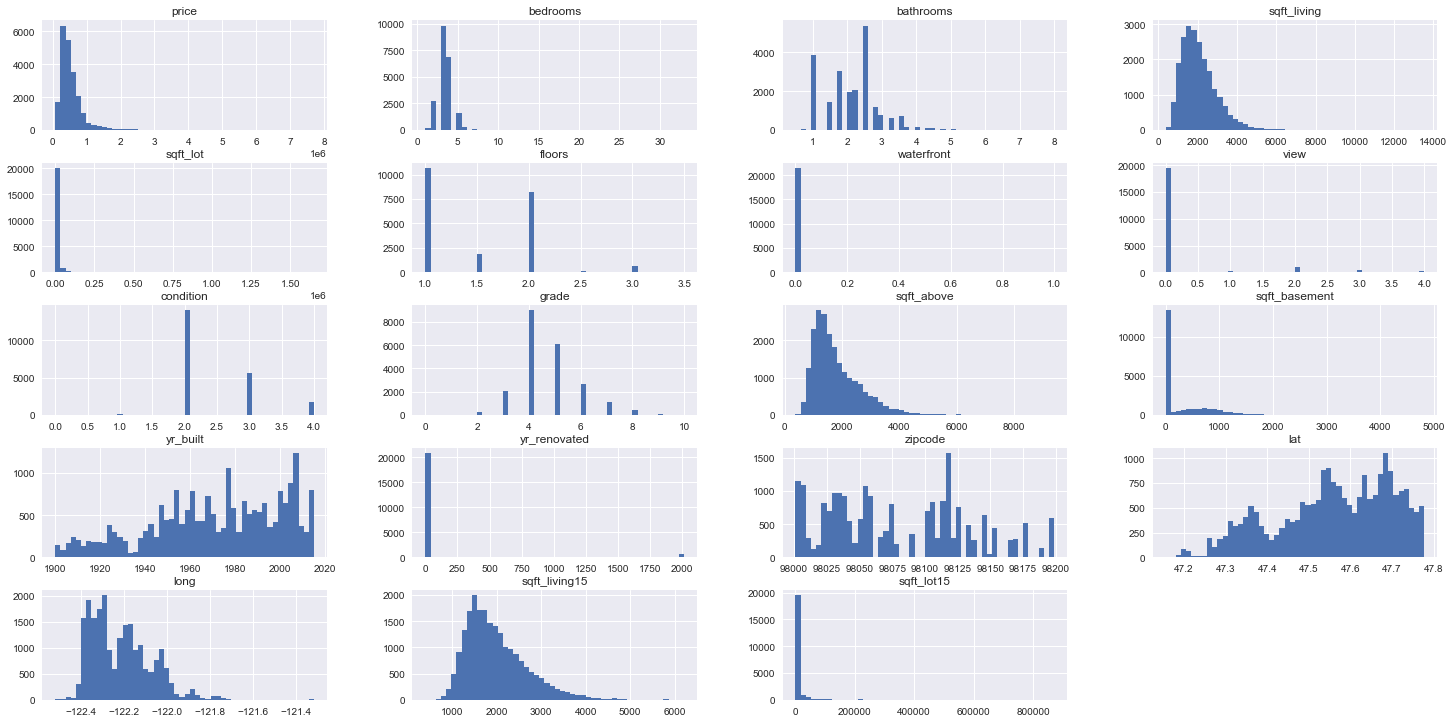

In [10]:
# plot histograms of all the columns in the set.
df.hist(bins=50, figsize=(25, 12.5))

Observations: 
* price, sqft_living, sqft_above, and sqft_living look approximately log-normally distributed.
* Most homes have 1-5 bedrooms
* long and lat look approximately to follow a trimodal distribution
* most homes do not have a view nor are waterfront properties
* most homes have a condition of 2 and many have a condition of 3
* grade is roughly normally distributed.
* most homes do not have a basement

### Scatterplot of each variable and price

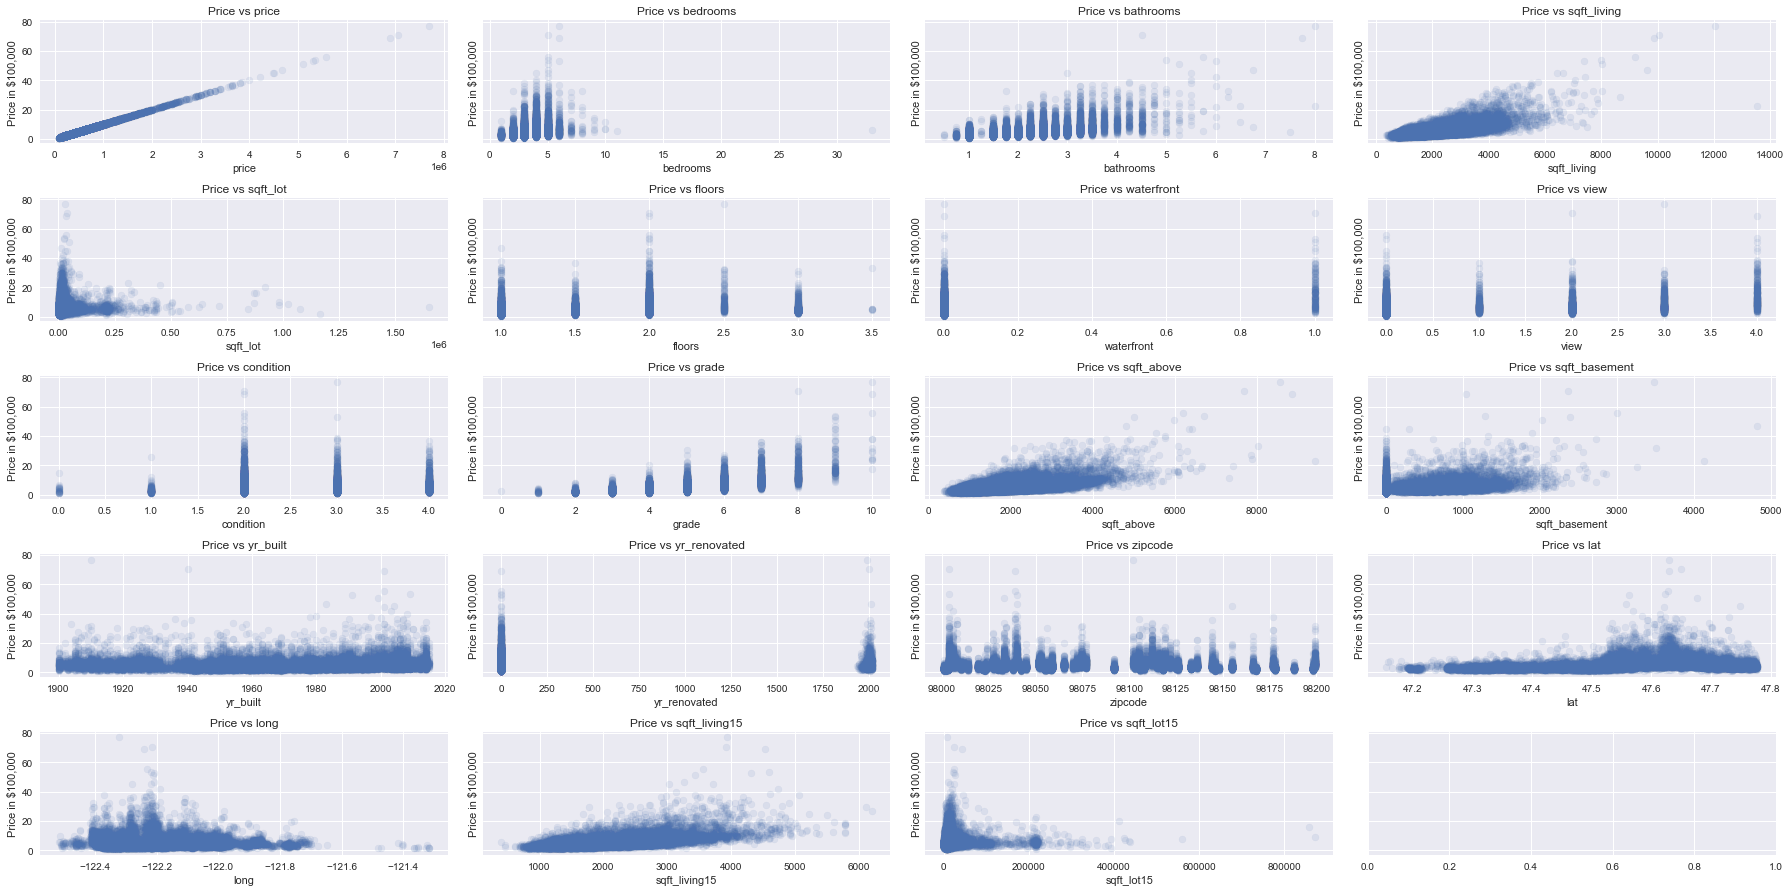

In [11]:
# visualize scatterplots of histograms with price as y variable
fig, axes = plt.subplots(nrows=5, ncols=4, figsize=(25, 12.5), sharey=True)

for ax, column in zip(axes.flatten(), df.columns):
    ax.scatter(df[column], df['price'] / 100_000, label=column, alpha=.1)
    ax.set_title(f'Price vs {column}')
    ax.set_xlabel(column)
    ax.set_ylabel('Price in $100,000')

fig.tight_layout()

Observations:
* sqft_living and price are fairly linearly related.
* grade and price are somewhat linearly related
* sqft_above and sqft_living15 are somewhat linearly related to price.

### Correlation heatmap

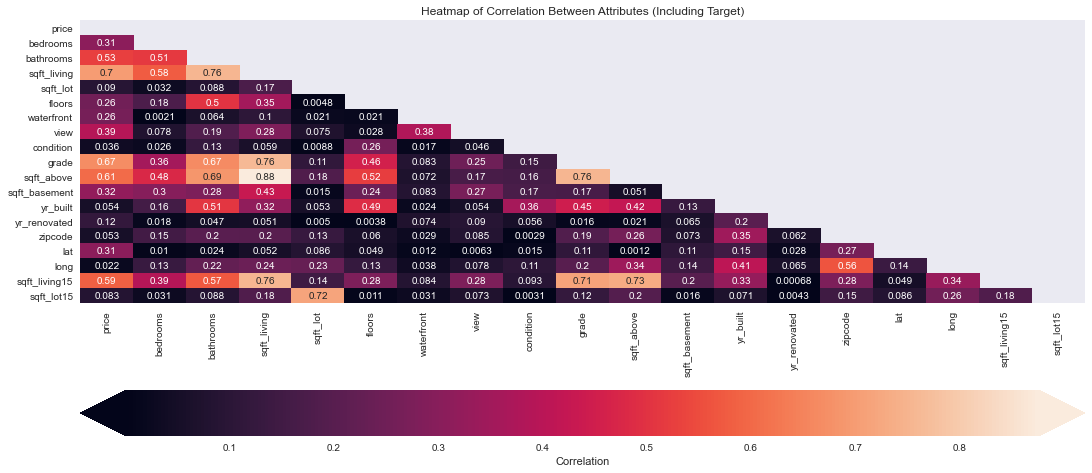

In [12]:
# adapted from dsc-linear-regression-lab
# author: hoffm386
# link: https://github.com/learn-co-curriculum/dsc-linear-regression-lab/tree/solution
heatmap_data = df
corr = np.abs(heatmap_data.corr())

# Set up figure and axes
fig, ax = plt.subplots(figsize=(18, 8))

# Plot a heatmap of the correlation matrix, with both
# numbers and colors indicating the correlations
sns.heatmap(
    data=corr,
    mask=np.triu(np.ones_like(corr, dtype=bool)),
    ax=ax,
    annot=True,
    cbar_kws={"label": "Correlation", "orientation": "horizontal", "pad": .2,
              "extend": "both"}
)

ax.set_title("Heatmap of Correlation Between Attributes (Including Target)");

Observations:
* sqft_living, grade, and sqft_above are all correlated above 0.6 with price
* predictor variable correlation pairs above 0.6: (grade, sqft_living15), (sqft_above, sqft_living15), (grade, sqft_above), (sqft_lot, sqft_lot15), (sqft_living, sqft_living15), (sqft_living, sqft_above), (sqft_living, grade), (bathrooms, sqft_above), (bathrooms, grade), (bathrooms, sqft_living)

### Investigate linear regression assumptions for each numerical variable.

In [13]:
df.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15'],
      dtype='object')

Regression Diagnostics for Price~price


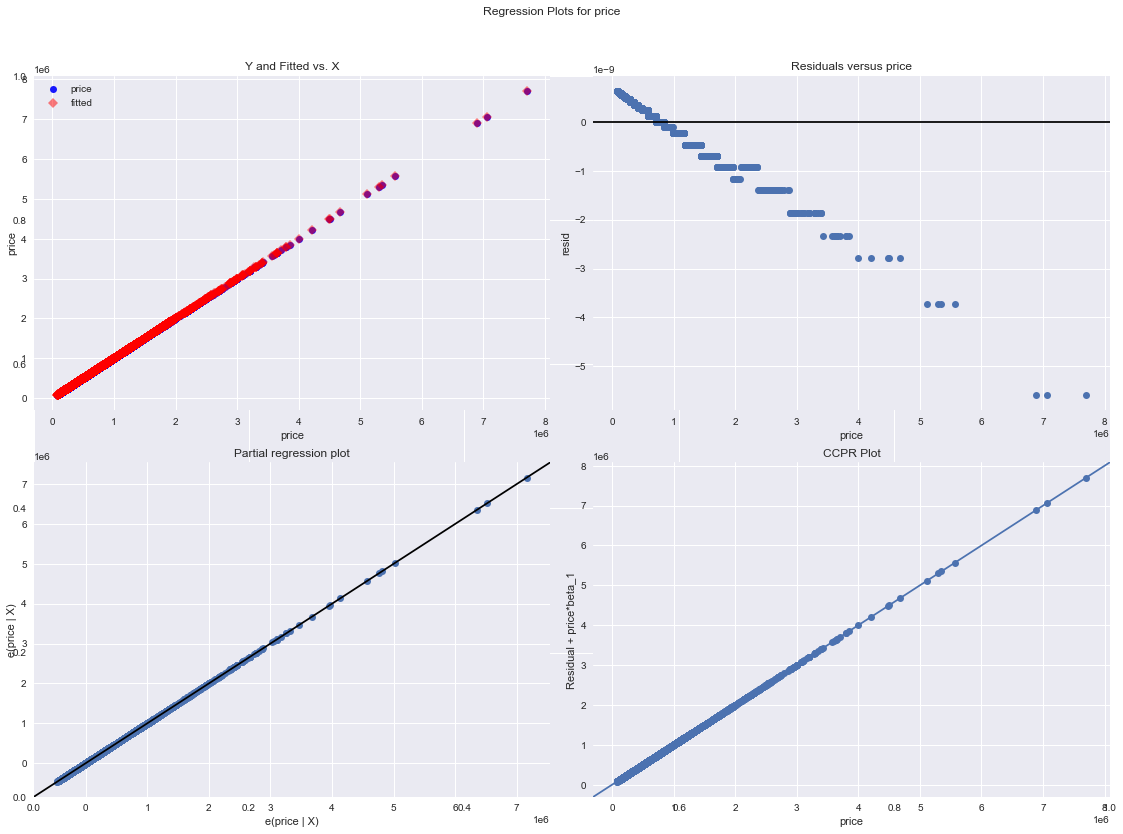

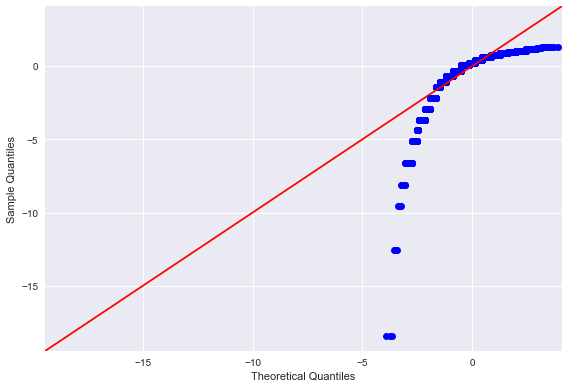

Regression Diagnostics for Price~bedrooms


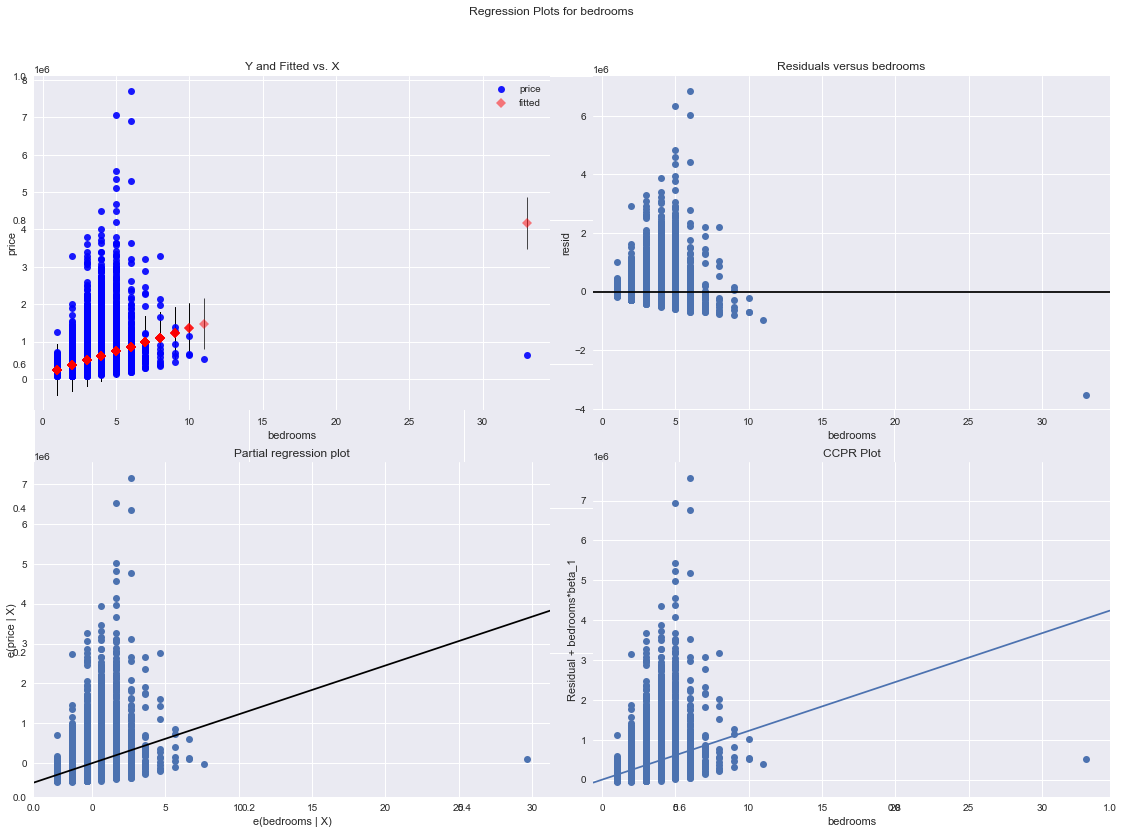

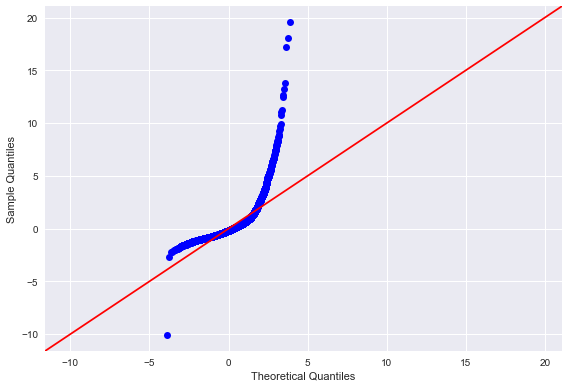

Regression Diagnostics for Price~bathrooms


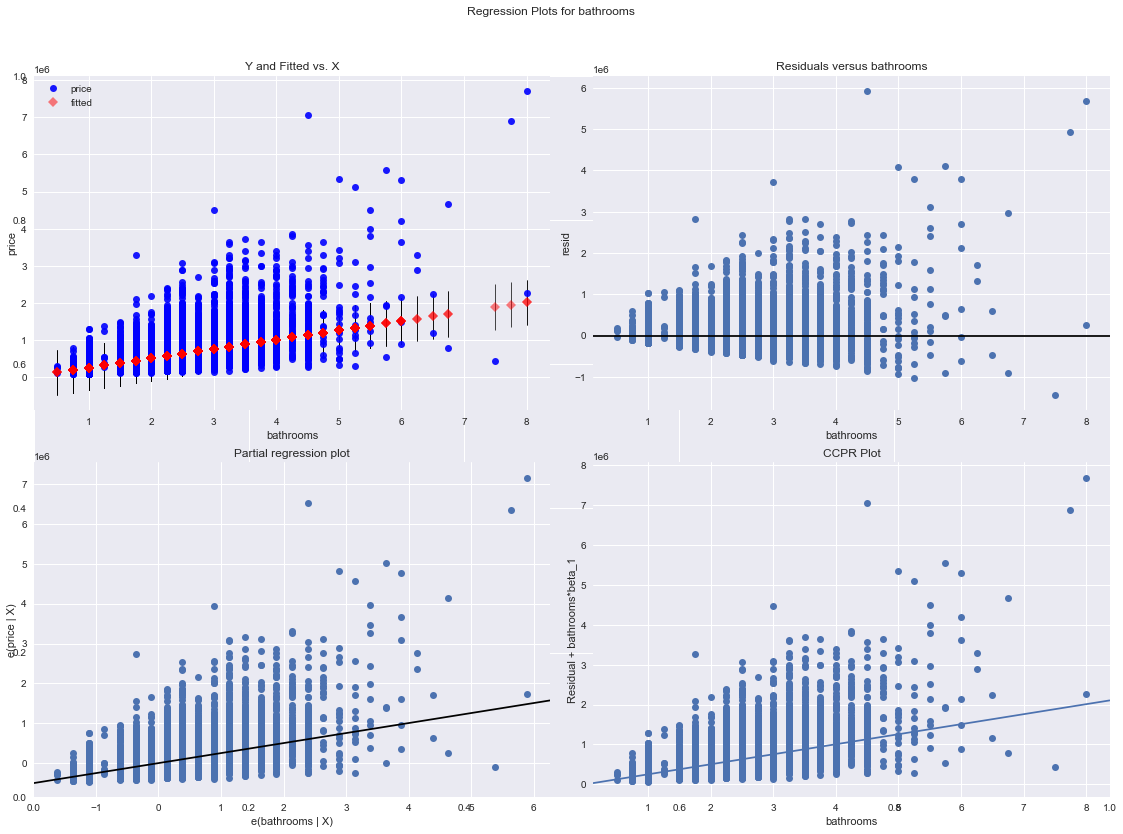

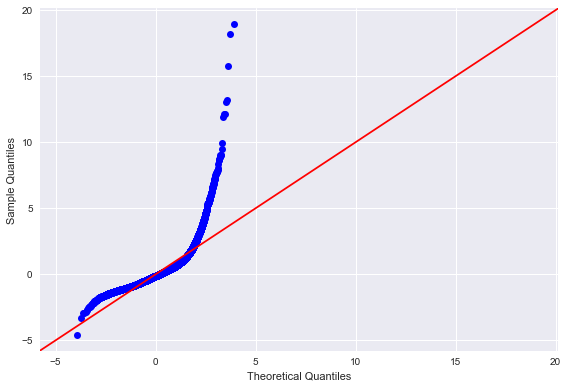

Regression Diagnostics for Price~sqft_living


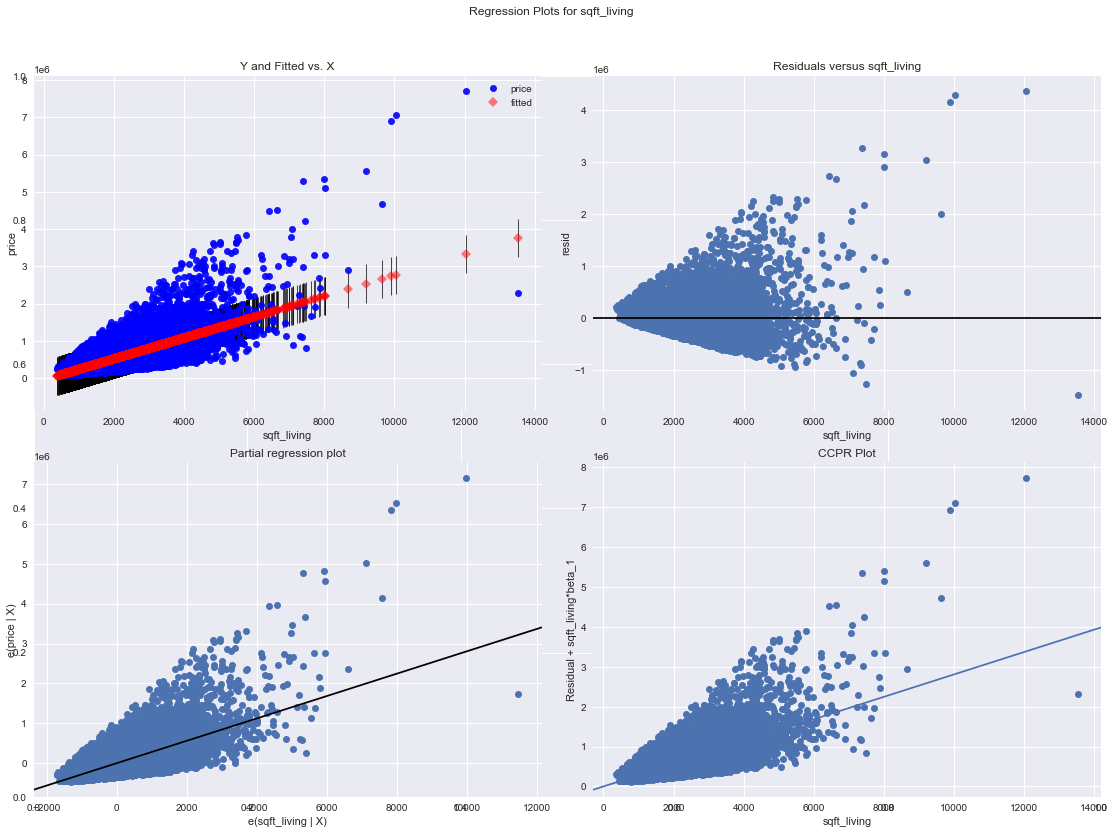

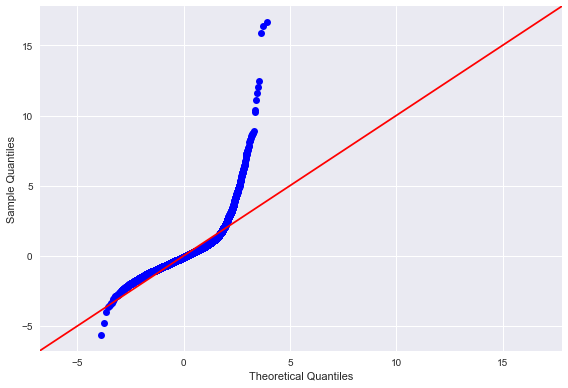

Regression Diagnostics for Price~sqft_lot


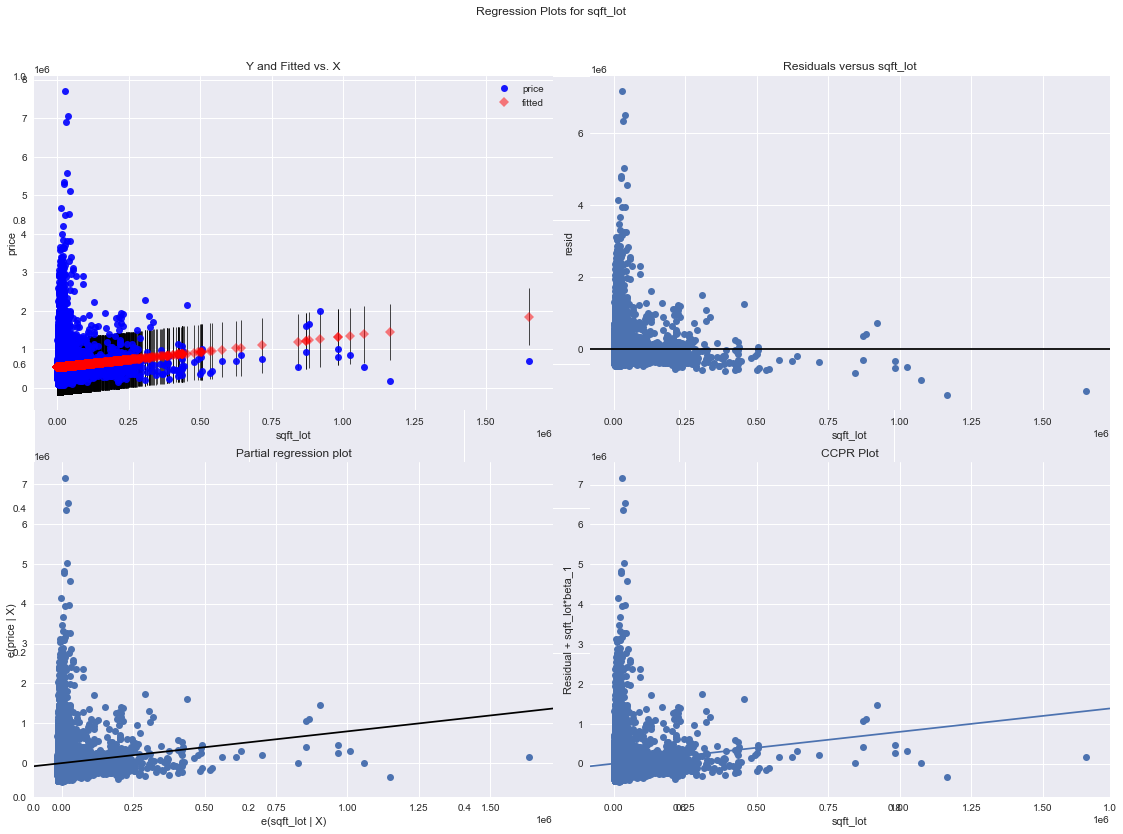

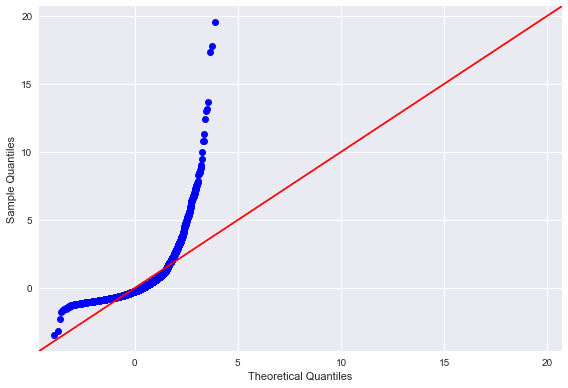

Regression Diagnostics for Price~floors


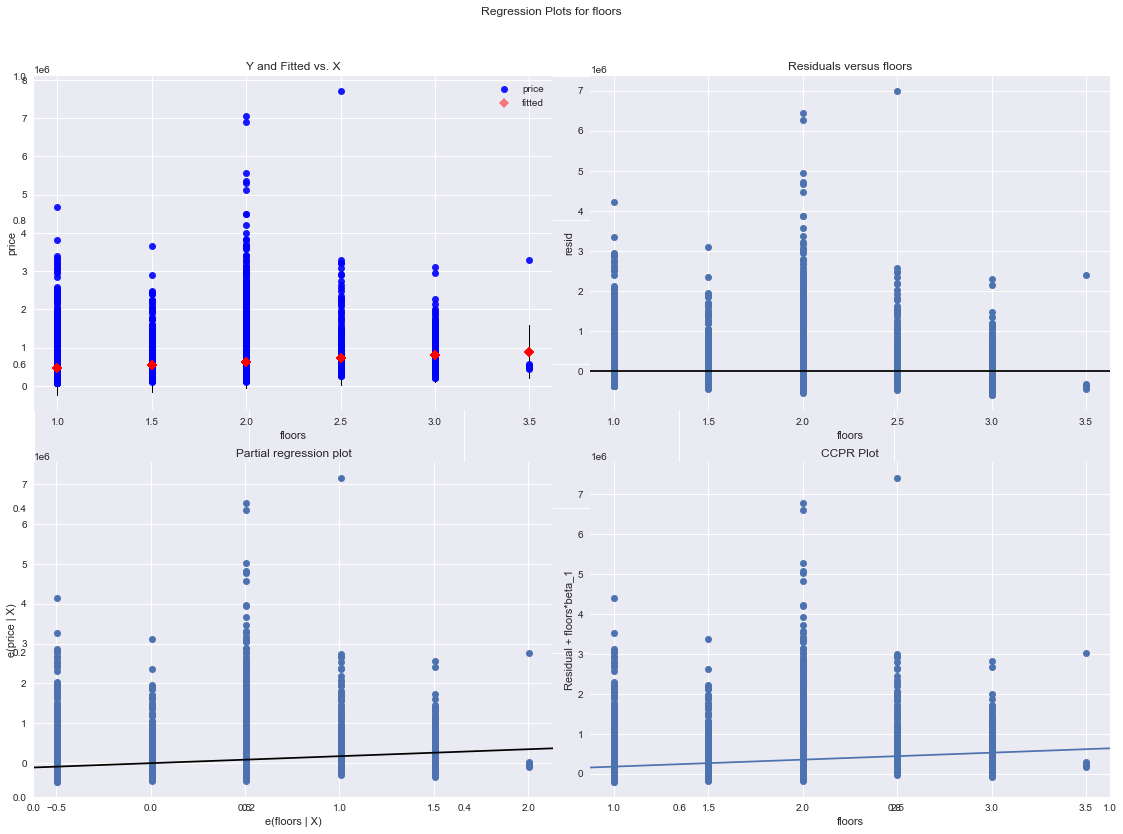

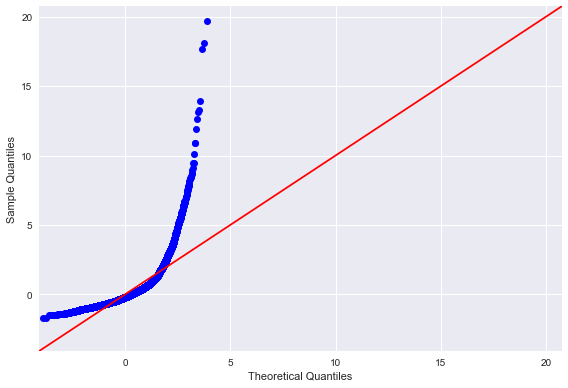

Regression Diagnostics for Price~sqft_above


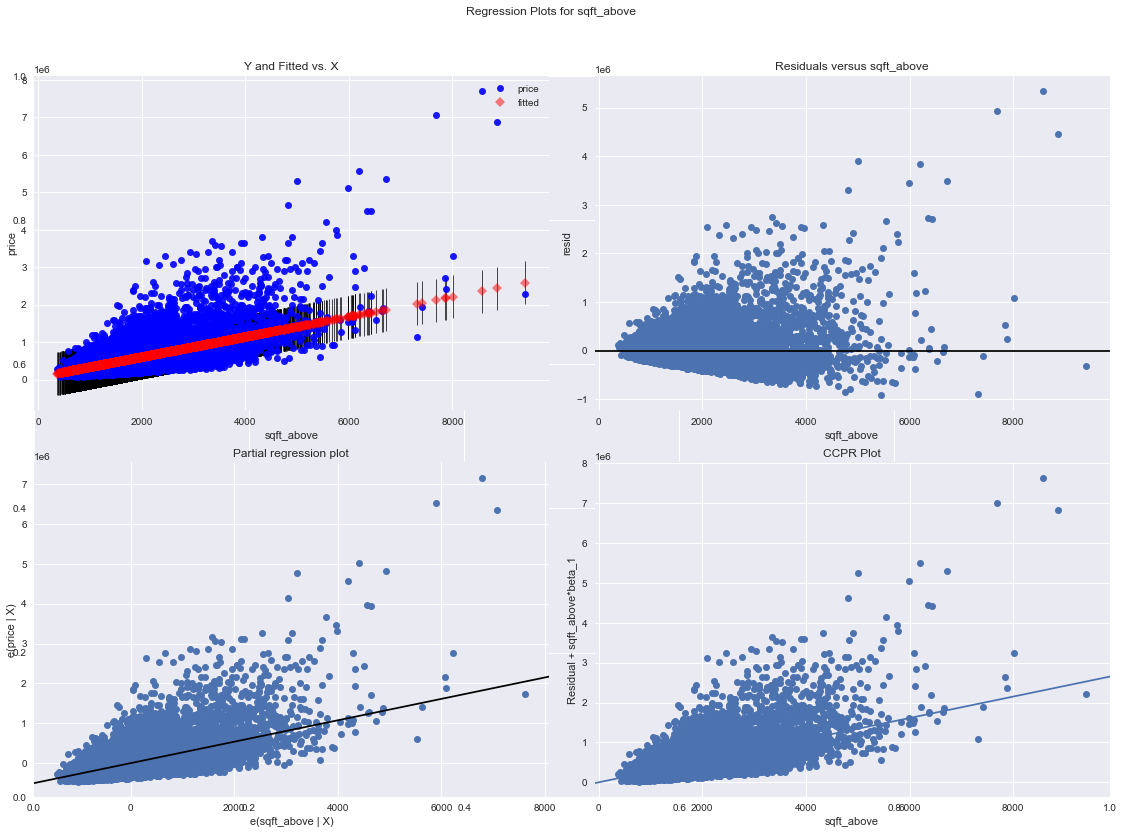

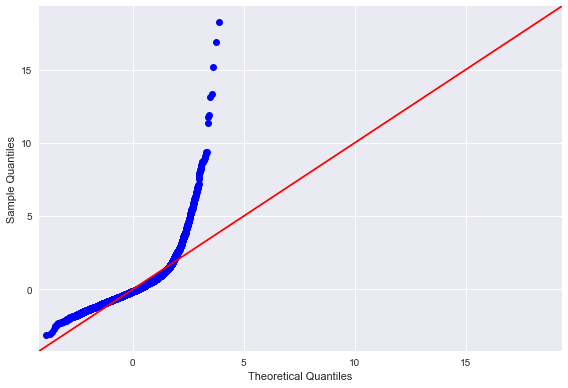

Regression Diagnostics for Price~sqft_basement


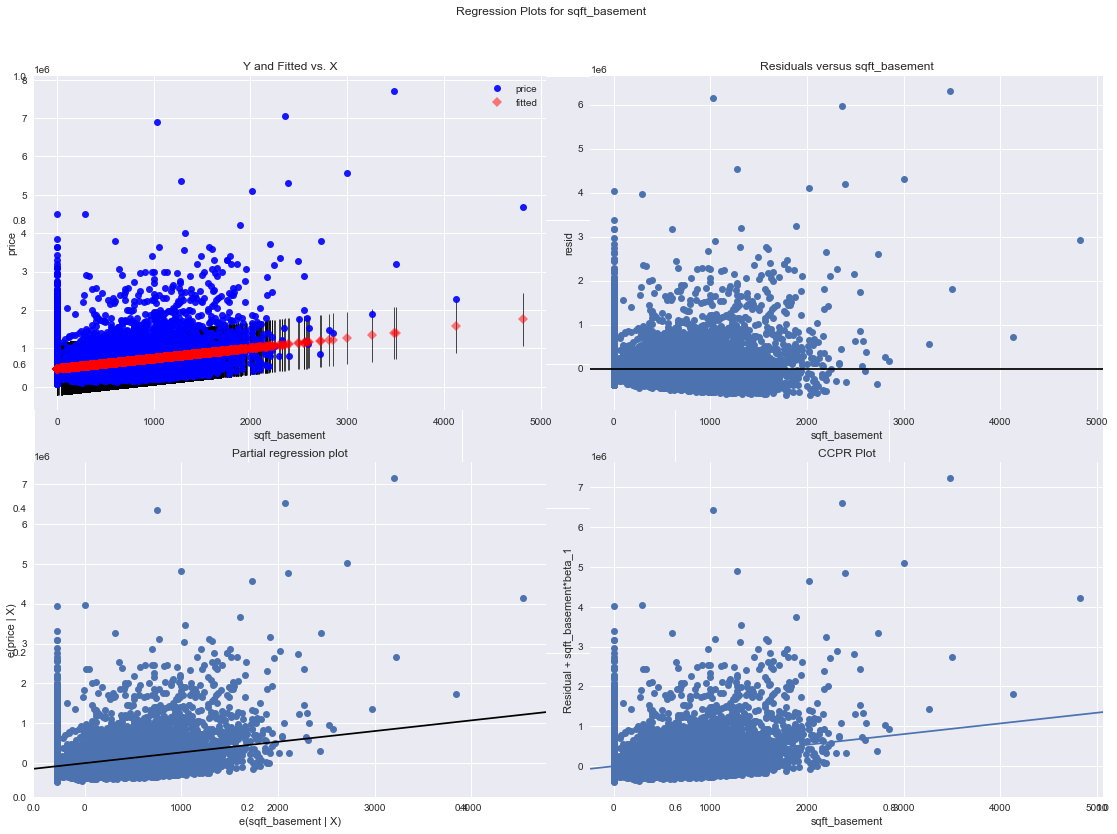

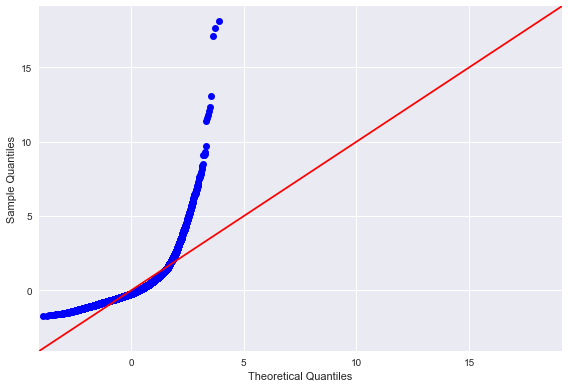

Regression Diagnostics for Price~sqft_living15


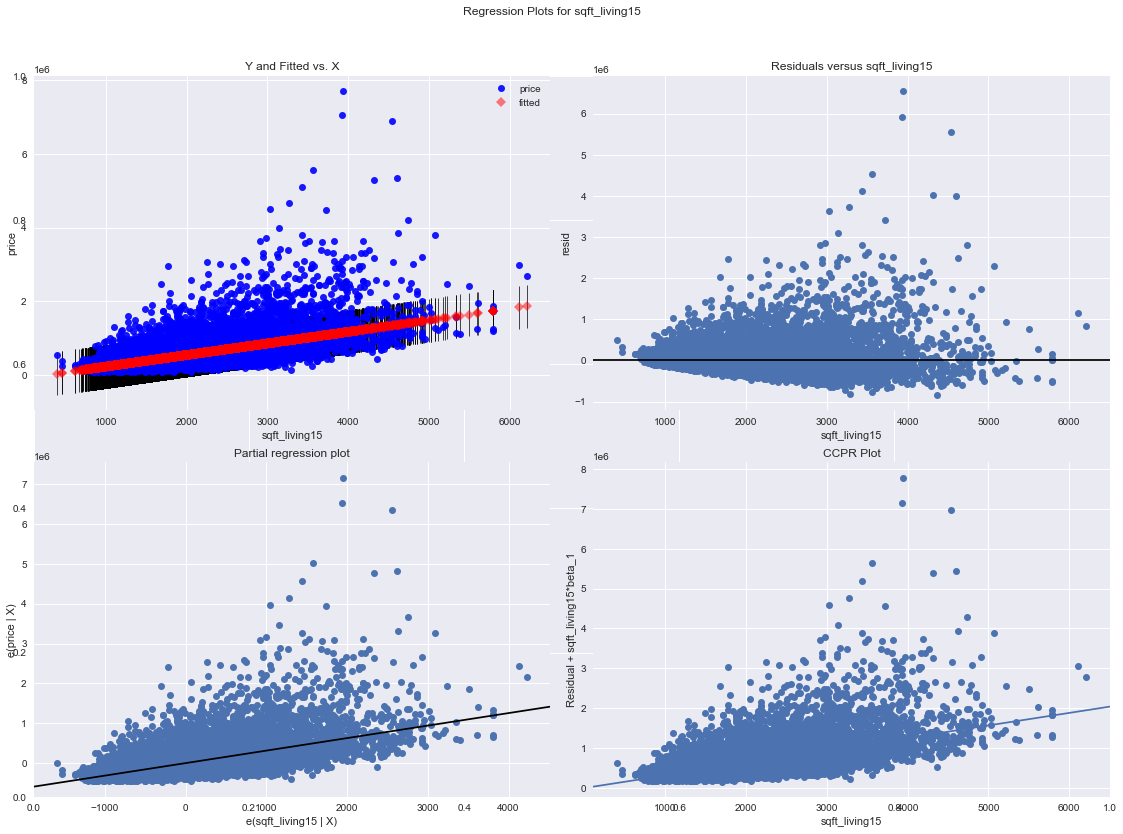

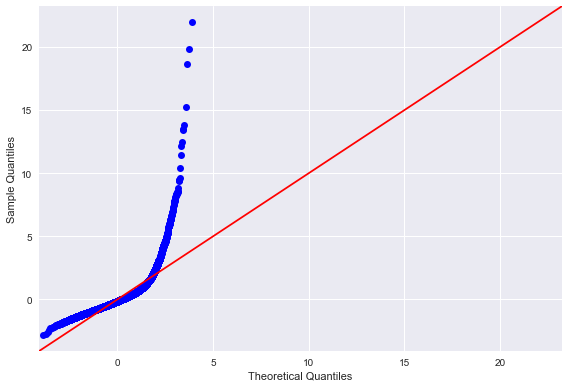

Regression Diagnostics for Price~sqft_lot15


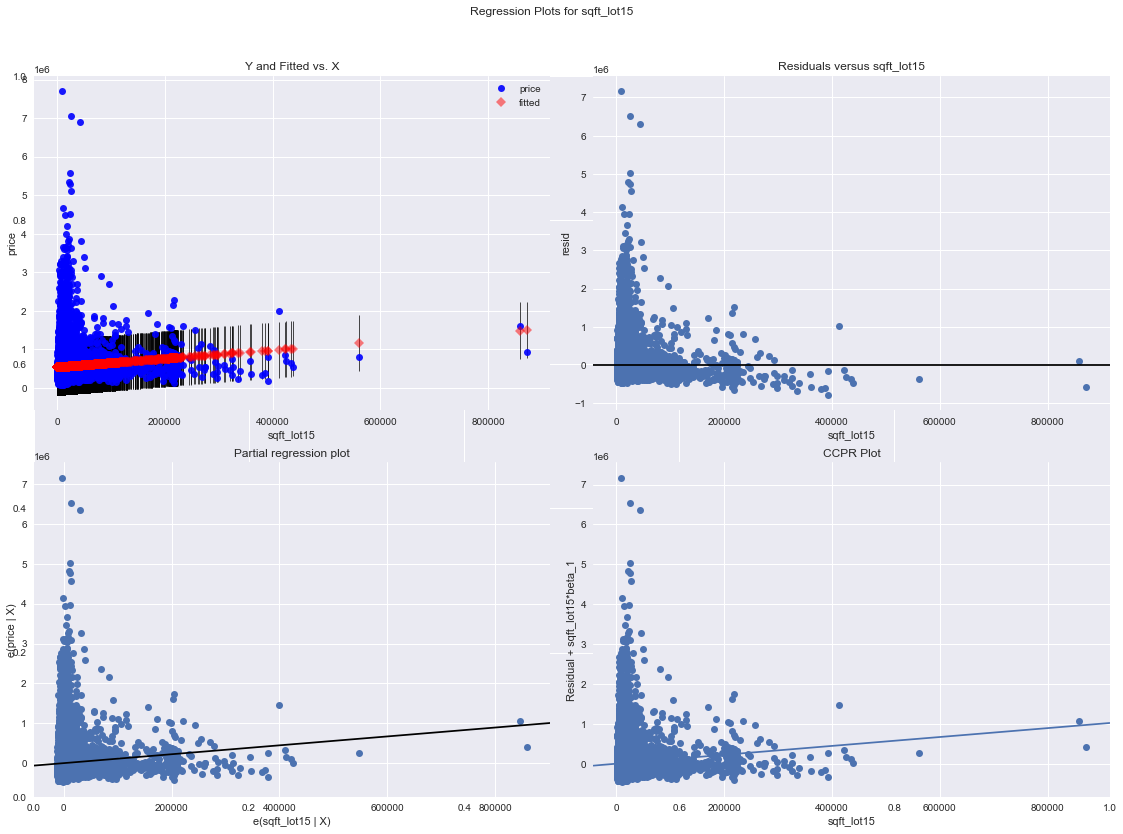

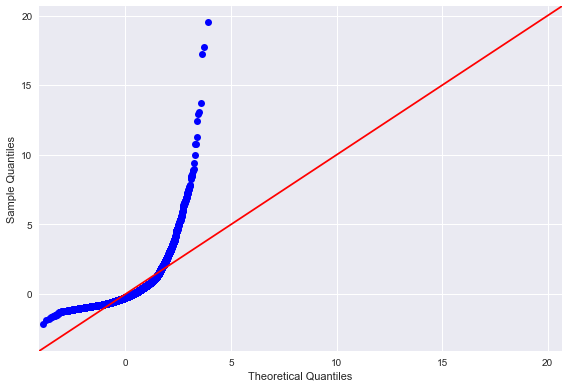

In [14]:
# create df with numerics to check lr assumptions
df_numerics = df.drop(['waterfront', 'view', 'yr_built', 'yr_renovated', 
                       'zipcode', 'lat', 'long', 'grade', 'condition'], axis=1)

# check assumptions
for idx, column in enumerate(df_numerics.columns):
    print(f"Regression Diagnostics for Price~{column}")
    
    f = f'price~{column}'
    model = smf.ols(formula=f, data=df_numerics).fit()
    
    fig, axes = plt.subplots(figsize=(16,12))
    fig = sm.graphics.plot_regress_exog(model, column, fig=fig)
    fig = sm.graphics.qqplot(model.resid, dist=stats.norm, line='45', fit=True)
    fig.tight_layout()
    plt.show()

## Modeling

### Helper functions for modeling

In [15]:
# establish LinearRegression() variable for later use
lr = LinearRegression()

# import for finding r-squared value
from sklearn.metrics import r2_score

In [16]:
# this function places the data in train_test_split and builds a linear
# regression model. 
# Inputs: parameters for modeling & target variable
# Returns: r-squared value
def lin_model(X,y):
    # split into train and test. Use default split size of 0.25 and use same
    # random_state for consistency
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=24)
    
    # fit the model
    lr.fit(X_train, y_train)
    
    # return r-squared
    return lr.score(X_train, y_train)

In [17]:
# this function facillitates log transformation of variables
# inputs: list of variables to be log-transformed and the dataframe that hosts
# these variables
# returns: the modified dataframe
def var_log_transform(var_list, df):
    for var in var_list:
        log_var = np.log(df[var])     # log the variable
        df = df.drop([var], axis=1)     # drop the variable from the df
        df[var] = log_var     # add the logged variable into the df
    return df     # return the df

In [18]:
# this function creates dummy variables for a list of variables and
# concatonates these variables onto the df
# inputs: list of variables to be dummied, df
# returns: df with modified vars
def dum_transformation(dum_list, df):
    for d in dum_list:
        dum = pd.get_dummies(df[d], prefix=d, drop_first=True)     # create dummies
        df = df.drop([d], axis=1)    # drop old variable
        df = pd.concat([df, dum], axis=1)    # add dummies into df
    return df     # return the df

In [19]:
# this function allows efficient statsmodels linear regression modeling
# inputs: df
# returns list: fitted model - can do print(str({name of model}.summary())), 
# X, df_x, df_train_y
def sm_lin_model(df):
    df_y = df[['price']]     # assumes target is 'price' establish y-var df
    df_x = df.drop(['price'], axis=1)  # same assumption and creates x-var df
    
    df_train_x, df_test_x, df_train_y, df_test_y = train_test_split(df_x, df_y, random_state=42)
    
    X = sm.add_constant(df_train_x)

    # Fit the linear regression model
    model = sm.OLS(df_train_y, X)     # instantiate model
    res = model.fit()     # fit model
    
    # Creating a list of items to return for later use.
    # to_ret = [res, X, df_train_y, df_x]
    
    return res, X, df_y, df_x, df_train_x, df_train_y  # returns the fitted model - can then print summary as str

In [20]:
# this function plots the residuals of the model to check if they follow a
# normal distribution. This function uses a Q-Q-Plot, which should follow a
# linear trend if the assumption is correct.
# inputs: fitted model
def sm_check_resid_normality(res):
    df_residuals = res.resid
    mod_res = sm.graphics.qqplot(df_residuals, dist=stats.norm, line='45', 
                                 fit=True)

In [21]:
# this function plots the homoscedasticity of a linear regression model
# inputs: res (fitted model), df_train_y, X (of form: sm.add_constant(df_train_x))
def sm_check_scedas(res, df_train_y, X):    
    # check for homoscedasticity
    plt.scatter(res.predict(X), res.resid)     
    plt.plot(res.predict(X), [0 for i in range(len(df_train_y))])

    plt.title('Linear Regression Model Homoscedasticity');

In [22]:
# this function checks multicollinearity btwn independent variables
# inputs: dataframe with the independent variables (df_x)
# returns: list of variables with VIF values - be cautious of vals > 5
def multicollinearity_check(df_x):
    X = df_x
    vif = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    return list(zip(list(df_x.columns), vif))

In [23]:
# this function filters values from a categorical variable based on the IQR
# for each value in the category.
# inputs: the category (type is string) & the dataframe
# returns: the dataframe with modifications
def IQR_filter_categorical(cat, df):
    # create variable with all the unique values from the category.
    cat_uniques = df[cat].unique()
    
    for value in cat_uniques:
        # create new df with each value from the category
        df_cat = pd.DataFrame()
        df_cat = df[df[cat] == value]
        
        # find first and third quartiles
        q3, q1 = np.percentile(df_cat.price, [75 ,25])
    
        iqr = q3 - q1

        # define and drop outliers
        upper_bound = q3 + 1.5 * iqr
        lower_bound = q1 - 1.5 * iqr

        for row in df.index:
            if df.loc[row, cat] == value:
                if (df.loc[row, 'price'] > upper_bound) |  (df.loc[row, 'price'] < lower_bound):
                    df = df.drop(labels=row, axis=0)
    
    return df

In [24]:
# this function filters values from a numerical variable based on the IQR
# for each value in the category.
# inputs: the category (type is df column (ex: df.price)) & the dataframe
def IQR_filter_numerical(cat, df): 
    # comparison to others. Going to try dropping these values based off of IQR
    q3, q1 = np.percentile(cat, [75 ,25])
    iqr = q3 - q1

    # define and drop outliers
    upper_bound = q3 + 1.5 * iqr
    lower_bound = q1 - 1.5 * iqr

    df = df[(cat < upper_bound) & (cat > lower_bound)]

    return df

### Model 1

I will use sqft_living and grade for the first model. Grade may be tricky because it is categorical. It may need to be treated with dummy variables, label encoding, or some other method in future models.

I will use statsmodels to create a linear regression model, and I will also use it to check linear regression assumptions (linearity, normality, homoscedasticity, and p-value < 0.05.

#### Create dataframe

In [25]:
# create df with just price, grade, and sqft_living
df_model1 = df[['price', 'sqft_living', 'grade']].copy()

#### Check linearity assumption

* Check if there is a linear relationship between each predictor and target variable.
* Check for outliers 

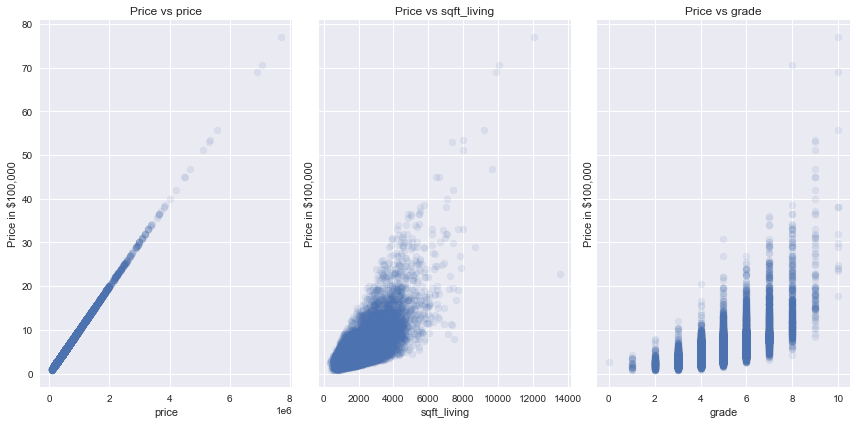

In [26]:
# check assumptions
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(12, 6), sharey=True)

for ax, column in zip(axes.flatten(), df_model1.columns):
    ax.scatter(df[column], df['price'] / 100_000, label=column, alpha=.1)
    ax.set_title(f'Price vs {column}')
    ax.set_xlabel(column)
    ax.set_ylabel('Price in $100,000')

fig.tight_layout()

Neither variables follow the normality assumption, but I will still model and fix these assumptions later.

#### Fit the model

In [27]:
res, X, df_y, df_x, df_train_x, df_train_y = sm_lin_model(df_model1)

In [28]:
print(str(res.summary()))

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.536
Model:                            OLS   Adj. R-squared:                  0.536
Method:                 Least Squares   F-statistic:                     9352.
Date:                Sat, 30 Apr 2022   Prob (F-statistic):               0.00
Time:                        22:52:56   Log-Likelihood:            -2.2427e+05
No. Observations:               16197   AIC:                         4.485e+05
Df Residuals:                   16194   BIC:                         4.486e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -3.129e+05   8383.424    -37.318      

#### Check assumptions

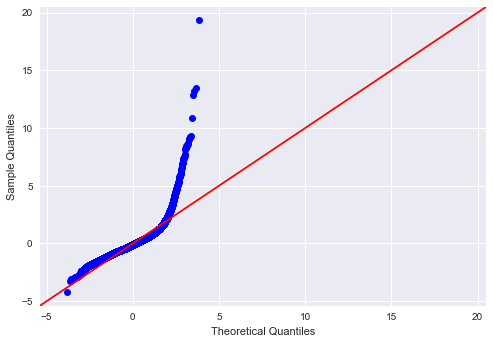

In [29]:
# Normality of residuals
sm_check_resid_normality(res)

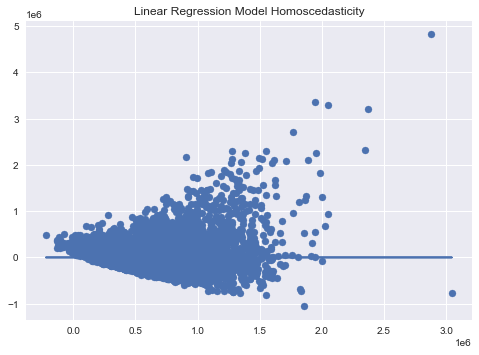

In [30]:
sm_check_scedas(res, df_train_y, X)

None of the assumptions were met, and the model produced a low r^2 value.

#### Evaluate model error with MAE

In [32]:
# generate predictions
ypred = res.predict(X)

# calc MAE
mae = meanabs
mae = mae(df_train_y['price'], ypred)
mae

165041.76217912533

### Model 2

This model will utilize sqft_living and grade again, but it will handle grade with a method used for transforming categorical variables.

#### Create dummy variables for grade

In [33]:
df1 = df[['grade','price','sqft_living']].copy()
dum_list = ['grade']
df1 = dum_transformation(dum_list, df1)     # use custom dummy function
df1

price  sqft_living  grade_1  grade_2  grade_3  grade_4  grade_5  \
0      221900.0         1180        0        0        0        1        0   
1      538000.0         2570        0        0        0        1        0   
2      180000.0          770        0        0        1        0        0   
3      604000.0         1960        0        0        0        1        0   
4      510000.0         1680        0        0        0        0        1   
...         ...          ...      ...      ...      ...      ...      ...   
21592  360000.0         1530        0        0        0        0        1   
21593  400000.0         2310        0        0        0        0        1   
21594  402101.0         1020        0        0        0        1        0   
21595  400000.0         1600        0        0        0        0        1   
21596  325000.0         1020        0        0        0        1        0   

       grade_6  grade_7  grade_8  grade_9  grade_10  
0            0        0        0        0         0  
1            0        0        0        0         0  
2            0        0        0        0         0  
3            0        0        0        0         0  
4            0        0        0        0         0  
...        ...      ...      ...      ...       ...  
21592        0        0        0        0         0  
21593        0        0        0        0         0  
21594        0        0        0        0         0  
21595        0        0        0        0         0  
21596        0        0        0        0         0  

[21597 rows x 12 columns]

#### Check linearity assumption

* this was checked in model 1

#### Create and evaluate the model

In [34]:
res, X, df_y, df_x, df_train_x, df_train_y = sm_lin_model(df1)

In [35]:
print(str(res.summary()))

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.585
Model:                            OLS   Adj. R-squared:                  0.585
Method:                 Least Squares   F-statistic:                     2076.
Date:                Sat, 30 Apr 2022   Prob (F-statistic):               0.00
Time:                        22:52:56   Log-Likelihood:            -2.2336e+05
No. Observations:               16197   AIC:                         4.467e+05
Df Residuals:                   16185   BIC:                         4.468e+05
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        1.823e+05   2.36e+05      0.772      

That's an improvement from the first model, but it's still not great. It's time to incorporate some other variables and possibly try to normalize some of the variables that look log-normal.

#### Check assumptions

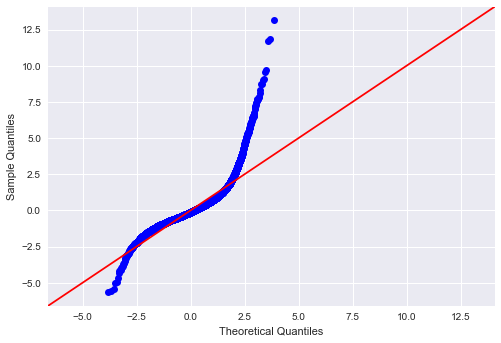

In [36]:
sm_check_resid_normality(res)

Model does not satisfy assumptions

### exploring relationship between sqft_living, sqft_above, sqft_basement

In [37]:
df_e = df[['sqft_living', 'sqft_above', 'sqft_basement']]
df_e

sqft_living  sqft_above  sqft_basement
0             1180        1180              0
1             2570        2170            400
2              770         770              0
3             1960        1050            910
4             1680        1680              0
...            ...         ...            ...
21592         1530        1530              0
21593         2310        2310              0
21594         1020        1020              0
21595         1600        1600              0
21596         1020        1020              0

[21597 rows x 3 columns]

Looks like sqft_living is the sum of sqft_above and sqft_basement

### Model 6 

In [89]:
df_13 = df.copy()
df_13.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [90]:
df_13.sqft_living.describe()

count    21597.000000
mean      2080.321850
std        918.106125
min        370.000000
25%       1430.000000
50%       1910.000000
75%       2550.000000
max      13540.000000
Name: sqft_living, dtype: float64

In [91]:
# suppressing scientific notation for more clear axis ticks
pd.set_option('display.float_format', lambda x: '%.2f' % x)

In [92]:
df_13['sqft_lot'].describe()

count     21597.00
mean      15099.41
std       41412.64
min         520.00
25%        5040.00
50%        7618.00
75%       10685.00
max     1651359.00
Name: sqft_lot, dtype: float64

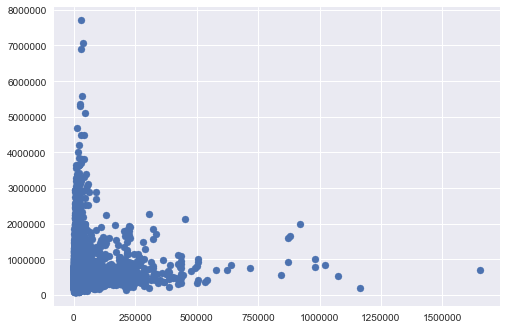

In [93]:
plt.ticklabel_format(useOffset=False, style='plain')
plt.scatter(x=df_13['sqft_lot'], y=df_13.price)

{'whiskers': [<matplotlib.lines.Line2D at 0x1df8280f730>,
 'caps': [<matplotlib.lines.Line2D at 0x1df827d04c0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1df8239afd0>],
 'medians': [<matplotlib.lines.Line2D at 0x1df82868dc0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1df82868af0>],
 'means': []}

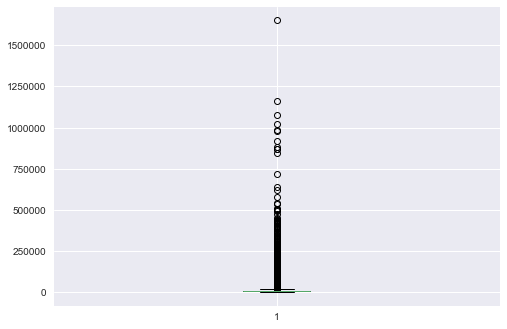

In [94]:
plt.ticklabel_format(useOffset=False, style='plain')     # suppress sci-fi not
plt.boxplot(x=df_13['sqft_lot'])

In [95]:
# apartments should be properties where the sqft_lot - sqft_living = 0
# I'm assuming that sqft_lot counts total sqft on property including a home,
# apartment, or any other structure.
df_13['lot-living sqft'] = df_13.apply(lambda x: x.sqft_lot - x.sqft_living, axis=1)
df_13

price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  \
0     221900.00         3       1.00         1180      5650    1.00   
1     538000.00         3       2.25         2570      7242    2.00   
2     180000.00         2       1.00          770     10000    1.00   
3     604000.00         4       3.00         1960      5000    1.00   
4     510000.00         3       2.00         1680      8080    1.00   
...         ...       ...        ...          ...       ...     ...   
21592 360000.00         3       2.50         1530      1131    3.00   
21593 400000.00         4       2.50         2310      5813    2.00   
21594 402101.00         2       0.75         1020      1350    2.00   
21595 400000.00         3       2.50         1600      2388    2.00   
21596 325000.00         2       0.75         1020      1076    2.00   

       waterfront  view  condition  grade  sqft_above  sqft_basement  \
0               0     0          2      4        1180              0   
1               0     0          2      4        2170            400   
2               0     0          2      3         770              0   
3               0     0          4      4        1050            910   
4               0     0          2      5        1680              0   
...           ...   ...        ...    ...         ...            ...   
21592           0     0          2      5        1530              0   
21593           0     0          2      5        2310              0   
21594           0     0          2      4        1020              0   
21595           0     0          2      5        1600              0   
21596           0     0          2      4        1020              0   

       yr_built  yr_renovated  zipcode   lat    long  sqft_living15  \
0          1955          0.00    98178 47.51 -122.26           1340   
1          1951       1991.00    98125 47.72 -122.32           1690   
2          1933          0.00    98028 47.74 -122.23           2720   
3          1965          0.00    98136 47.52 -122.39           1360   
4          1987          0.00    98074 47.62 -122.05           1800   
...         ...           ...      ...   ...     ...            ...   
21592      2009          0.00    98103 47.70 -122.35           1530   
21593      2014          0.00    98146 47.51 -122.36           1830   
21594      2009          0.00    98144 47.59 -122.30           1020   
21595      2004          0.00    98027 47.53 -122.07           1410   
21596      2008          0.00    98144 47.59 -122.30           1020   

       sqft_lot15  lot-living sqft  
0            5650          4470.00  
1            7639          4672.00  
2            8062          9230.00  
3            5000          3040.00  
4            7503          6400.00  
...           ...              ...  
21592        1509          -399.00  
21593        7200          3503.00  
21594        2007           330.00  
21595        1287           788.00  
21596        1357            56.00  

[21597 rows x 20 columns]

In [96]:
df_13['lot-living sqft'].describe()

count     21597.00
mean      13019.09
std       41263.30
min       -1900.00
25%        3095.00
50%        5710.00
75%        8662.00
max     1650059.00
Name: lot-living sqft, dtype: float64

#### Feature Engineering

In [97]:
# Looks like sqft_lot counts area of property besides structures (sqft_living)
# So sqft_lot + sqft_living is probably total sqft
df_13['total_sqft'] = df_13.apply(lambda x: x.sqft_lot + x.sqft_living, axis=1)
df_13 = df_13.drop(['lot-living sqft'], axis=1)
df_13

price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  \
0     221900.00         3       1.00         1180      5650    1.00   
1     538000.00         3       2.25         2570      7242    2.00   
2     180000.00         2       1.00          770     10000    1.00   
3     604000.00         4       3.00         1960      5000    1.00   
4     510000.00         3       2.00         1680      8080    1.00   
...         ...       ...        ...          ...       ...     ...   
21592 360000.00         3       2.50         1530      1131    3.00   
21593 400000.00         4       2.50         2310      5813    2.00   
21594 402101.00         2       0.75         1020      1350    2.00   
21595 400000.00         3       2.50         1600      2388    2.00   
21596 325000.00         2       0.75         1020      1076    2.00   

       waterfront  view  condition  grade  sqft_above  sqft_basement  \
0               0     0          2      4        1180              0   
1               0     0          2      4        2170            400   
2               0     0          2      3         770              0   
3               0     0          4      4        1050            910   
4               0     0          2      5        1680              0   
...           ...   ...        ...    ...         ...            ...   
21592           0     0          2      5        1530              0   
21593           0     0          2      5        2310              0   
21594           0     0          2      4        1020              0   
21595           0     0          2      5        1600              0   
21596           0     0          2      4        1020              0   

       yr_built  yr_renovated  zipcode   lat    long  sqft_living15  \
0          1955          0.00    98178 47.51 -122.26           1340   
1          1951       1991.00    98125 47.72 -122.32           1690   
2          1933          0.00    98028 47.74 -122.23           2720   
3          1965          0.00    98136 47.52 -122.39           1360   
4          1987          0.00    98074 47.62 -122.05           1800   
...         ...           ...      ...   ...     ...            ...   
21592      2009          0.00    98103 47.70 -122.35           1530   
21593      2014          0.00    98146 47.51 -122.36           1830   
21594      2009          0.00    98144 47.59 -122.30           1020   
21595      2004          0.00    98027 47.53 -122.07           1410   
21596      2008          0.00    98144 47.59 -122.30           1020   

       sqft_lot15  total_sqft  
0            5650     6830.00  
1            7639     9812.00  
2            8062    10770.00  
3            5000     6960.00  
4            7503     9760.00  
...           ...         ...  
21592        1509     2661.00  
21593        7200     8123.00  
21594        2007     2370.00  
21595        1287     3988.00  
21596        1357     2096.00  

[21597 rows x 20 columns]

In [98]:
df_13.total_sqft.describe()

count     21597.00
mean      17179.73
std       41581.72
min        1423.00
25%        7036.00
50%        9575.00
75%       12995.00
max     1652659.00
Name: total_sqft, dtype: float64

<AxesSubplot:>

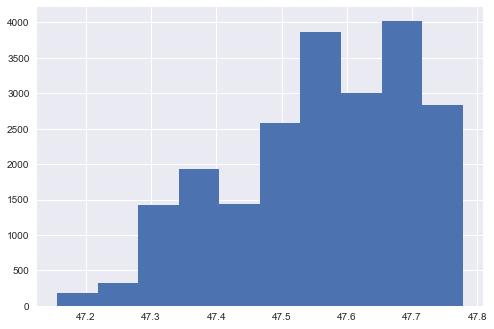

In [99]:
# what about grouping lat & long together and binning or just binning the two?
df_13.lat.hist(bins=10)

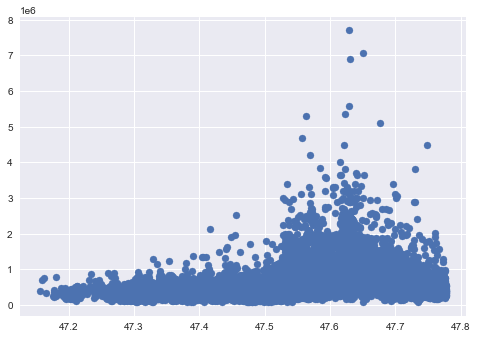

In [100]:
plt.scatter(x=df_13.lat, y=df_13.price)

In [101]:
df_13.lat.describe()

count   21597.00
mean       47.56
std         0.14
min        47.16
25%        47.47
50%        47.57
75%        47.68
max        47.78
Name: lat, dtype: float64

<AxesSubplot:>

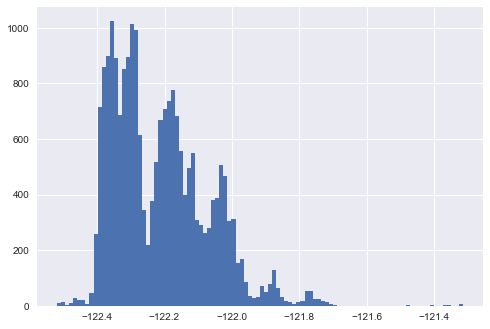

In [102]:
df_13.long.hist(bins=100)

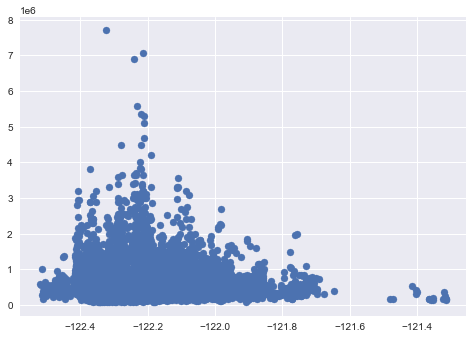

In [103]:
plt.scatter(x=df_13.long, y=df_13.price)

In [104]:
df_13.long.describe()

count   21597.00
mean     -122.21
std         0.14
min      -122.52
25%      -122.33
50%      -122.23
75%      -122.12
max      -121.31
Name: long, dtype: float64

In [105]:
# Looking at yr_built & yr_renovated: seems like newer homes would probably
# sell for more - newer parts means less likely to have major issues - more
# attractive to buyer, etc. 
df_13.yr_built.describe()

count   21597.00
mean     1971.00
std        29.38
min      1900.00
25%      1951.00
50%      1975.00
75%      1997.00
max      2015.00
Name: yr_built, dtype: float64

In [106]:
df_13.yr_renovated.describe()

count   21597.00
mean       68.76
std       364.04
min         0.00
25%         0.00
50%         0.00
75%         0.00
max      2015.00
Name: yr_renovated, dtype: float64

After looking through some of the data here: https://blue.kingcounty.com/Assessor/eRealProperty/ it seems like renovations are typically pretty major (i.e. adding a whole floor to the property). I am going to group homes into cats from old-new specifically 1-6 with cats: very old, old, somewhat old, somewhat new, new, and very new.
I am going to create an intermediary column as well that will be year built or renovated. I will then use this year to categorize homes into old - new categories such that each 20 years signifies a new category. For example, 'very old' (this will be 0 in the column) signifies homes built or renovated from 1895 - 1915.

In [107]:
# Create new year (old-new) column with values 0-6

# first, create an intermediary column that takes value of yr_renovated or 
# year_built. Will take yr_renovated if there is a value else yr_built
df_13['year_built_or_renovated'] = df_13.apply(lambda x: x.yr_renovated if (x.yr_renovated != 0.00) else x.yr_built, axis=1)

df_13

price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  \
0     221900.00         3       1.00         1180      5650    1.00   
1     538000.00         3       2.25         2570      7242    2.00   
2     180000.00         2       1.00          770     10000    1.00   
3     604000.00         4       3.00         1960      5000    1.00   
4     510000.00         3       2.00         1680      8080    1.00   
...         ...       ...        ...          ...       ...     ...   
21592 360000.00         3       2.50         1530      1131    3.00   
21593 400000.00         4       2.50         2310      5813    2.00   
21594 402101.00         2       0.75         1020      1350    2.00   
21595 400000.00         3       2.50         1600      2388    2.00   
21596 325000.00         2       0.75         1020      1076    2.00   

       waterfront  view  condition  grade  ...  sqft_basement  yr_built  \
0               0     0          2      4  ...              0      1955   
1               0     0          2      4  ...            400      1951   
2               0     0          2      3  ...              0      1933   
3               0     0          4      4  ...            910      1965   
4               0     0          2      5  ...              0      1987   
...           ...   ...        ...    ...  ...            ...       ...   
21592           0     0          2      5  ...              0      2009   
21593           0     0          2      5  ...              0      2014   
21594           0     0          2      4  ...              0      2009   
21595           0     0          2      5  ...              0      2004   
21596           0     0          2      4  ...              0      2008   

       yr_renovated  zipcode   lat    long  sqft_living15  sqft_lot15  \
0              0.00    98178 47.51 -122.26           1340        5650   
1           1991.00    98125 47.72 -122.32           1690        7639   
2              0.00    98028 47.74 -122.23           2720        8062   
3              0.00    98136 47.52 -122.39           1360        5000   
4              0.00    98074 47.62 -122.05           1800        7503   
...             ...      ...   ...     ...            ...         ...   
21592          0.00    98103 47.70 -122.35           1530        1509   
21593          0.00    98146 47.51 -122.36           1830        7200   
21594          0.00    98144 47.59 -122.30           1020        2007   
21595          0.00    98027 47.53 -122.07           1410        1287   
21596          0.00    98144 47.59 -122.30           1020        1357   

       total_sqft  year_built_or_renovated  
0         6830.00                  1955.00  
1         9812.00                  1991.00  
2        10770.00                  1933.00  
3         6960.00                  1965.00  
4         9760.00                  1987.00  
...           ...                      ...  
21592     2661.00                  2009.00  
21593     8123.00                  2014.00  
21594     2370.00                  2009.00  
21595     3988.00                  2004.00  
21596     2096.00                  2008.00  

[21597 rows x 21 columns]

In [108]:
df_13.year_built_or_renovated.describe()

count   21597.00
mean     1972.95
std        28.95
min      1900.00
25%      1954.00
50%      1977.00
75%      1999.00
max      2015.00
Name: year_built_or_renovated, dtype: float64

<AxesSubplot:>

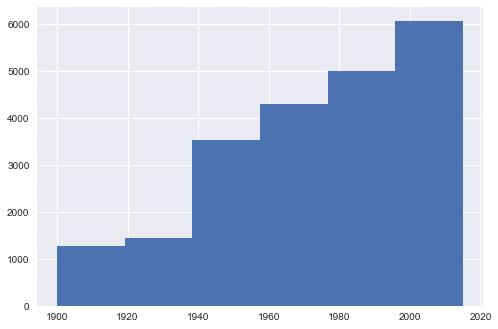

In [109]:
df_13.year_built_or_renovated.hist(bins=6)

#### Feature engineering 2

In [110]:
# This function facillitates with classifying homes as very old - very new
# input: column from dataframe
# output: list of integer values from 0-5
def old_new_classify(col):
    new_col = []
    for x in col:     # loops through each row
        if x < 1915.00:
            new_col.append(0)     # very old
        elif (x < 1935.00 and x > 1914.00):
            new_col.append(1)     # old
        elif (x < 1955.00 and x > 1934.00):
            new_col.append(2)     # somewhat old
        elif (x < 1975.00 and x > 1954.00):
            new_col.append(3)     # somewhat new
        elif (x < 1995.00 and x > 1974.00):
            new_col.append(4)     # new
        else:
            new_col.append(5)     # very new
    return new_col

In [111]:
df_13['old_new'] = old_new_classify(df_13['year_built_or_renovated'])

df_13

price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  \
0     221900.00         3       1.00         1180      5650    1.00   
1     538000.00         3       2.25         2570      7242    2.00   
2     180000.00         2       1.00          770     10000    1.00   
3     604000.00         4       3.00         1960      5000    1.00   
4     510000.00         3       2.00         1680      8080    1.00   
...         ...       ...        ...          ...       ...     ...   
21592 360000.00         3       2.50         1530      1131    3.00   
21593 400000.00         4       2.50         2310      5813    2.00   
21594 402101.00         2       0.75         1020      1350    2.00   
21595 400000.00         3       2.50         1600      2388    2.00   
21596 325000.00         2       0.75         1020      1076    2.00   

       waterfront  view  condition  grade  ...  yr_built  yr_renovated  \
0               0     0          2      4  ...      1955          0.00   
1               0     0          2      4  ...      1951       1991.00   
2               0     0          2      3  ...      1933          0.00   
3               0     0          4      4  ...      1965          0.00   
4               0     0          2      5  ...      1987          0.00   
...           ...   ...        ...    ...  ...       ...           ...   
21592           0     0          2      5  ...      2009          0.00   
21593           0     0          2      5  ...      2014          0.00   
21594           0     0          2      4  ...      2009          0.00   
21595           0     0          2      5  ...      2004          0.00   
21596           0     0          2      4  ...      2008          0.00   

       zipcode   lat    long  sqft_living15  sqft_lot15  total_sqft  \
0        98178 47.51 -122.26           1340        5650     6830.00   
1        98125 47.72 -122.32           1690        7639     9812.00   
2        98028 47.74 -122.23           2720        8062    10770.00   
3        98136 47.52 -122.39           1360        5000     6960.00   
4        98074 47.62 -122.05           1800        7503     9760.00   
...        ...   ...     ...            ...         ...         ...   
21592    98103 47.70 -122.35           1530        1509     2661.00   
21593    98146 47.51 -122.36           1830        7200     8123.00   
21594    98144 47.59 -122.30           1020        2007     2370.00   
21595    98027 47.53 -122.07           1410        1287     3988.00   
21596    98144 47.59 -122.30           1020        1357     2096.00   

       year_built_or_renovated  old_new  
0                      1955.00        3  
1                      1991.00        4  
2                      1933.00        1  
3                      1965.00        3  
4                      1987.00        4  
...                        ...      ...  
21592                  2009.00        5  
21593                  2014.00        5  
21594                  2009.00        5  
21595                  2004.00        5  
21596                  2008.00        5  

[21597 rows x 22 columns]

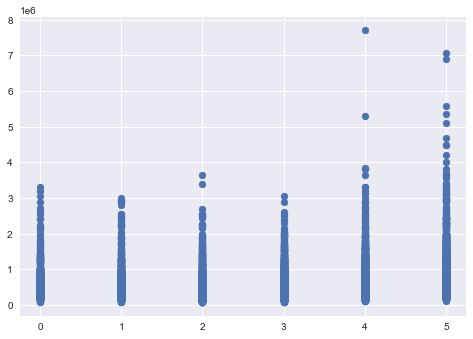

In [112]:
plt.scatter(x=df_13['old_new'], y=df_13.price)

It might be the case that some of the oldest homes might be considered historical and would thus increase the value of the home.

In [113]:
df_13.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15', 'total_sqft', 'year_built_or_renovated',
       'old_new'],
      dtype='object')

#### Pre-Processing

In [114]:
# dropping some variables that are not needed.
to_drop = ['yr_built', 'yr_renovated', 'lat', 'long', 'year_built_or_renovated']
df_13i = df_13.copy()
for col in to_drop:
    df_13i = df_13i.drop([col], axis=1)
    
df_13i

price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  \
0     221900.00         3       1.00         1180      5650    1.00   
1     538000.00         3       2.25         2570      7242    2.00   
2     180000.00         2       1.00          770     10000    1.00   
3     604000.00         4       3.00         1960      5000    1.00   
4     510000.00         3       2.00         1680      8080    1.00   
...         ...       ...        ...          ...       ...     ...   
21592 360000.00         3       2.50         1530      1131    3.00   
21593 400000.00         4       2.50         2310      5813    2.00   
21594 402101.00         2       0.75         1020      1350    2.00   
21595 400000.00         3       2.50         1600      2388    2.00   
21596 325000.00         2       0.75         1020      1076    2.00   

       waterfront  view  condition  grade  sqft_above  sqft_basement  zipcode  \
0               0     0          2      4        1180              0    98178   
1               0     0          2      4        2170            400    98125   
2               0     0          2      3         770              0    98028   
3               0     0          4      4        1050            910    98136   
4               0     0          2      5        1680              0    98074   
...           ...   ...        ...    ...         ...            ...      ...   
21592           0     0          2      5        1530              0    98103   
21593           0     0          2      5        2310              0    98146   
21594           0     0          2      4        1020              0    98144   
21595           0     0          2      5        1600              0    98027   
21596           0     0          2      4        1020              0    98144   

       sqft_living15  sqft_lot15  total_sqft  old_new  
0               1340        5650     6830.00        3  
1               1690        7639     9812.00        4  
2               2720        8062    10770.00        1  
3               1360        5000     6960.00        3  
4               1800        7503     9760.00        4  
...              ...         ...         ...      ...  
21592           1530        1509     2661.00        5  
21593           1830        7200     8123.00        5  
21594           1020        2007     2370.00        5  
21595           1410        1287     3988.00        5  
21596           1020        1357     2096.00        5  

[21597 rows x 17 columns]

<AxesSubplot:>

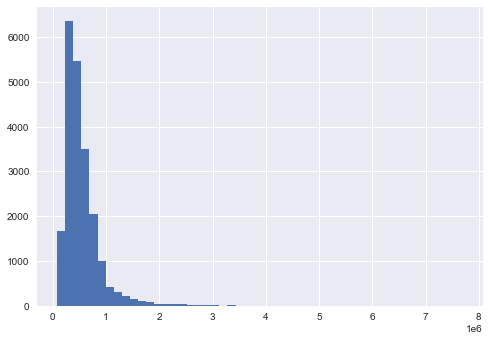

In [115]:
df_13i.price.hist(bins=50)

In [116]:
# remove the outlier of 33 bedrooms
df_13i = df_13i[df_13i['bedrooms'] < 32]

# log-normalize price
price_log = np.log(df_13i['price'])
df_13i = df_13i.drop(['price'], axis=1)
df_13i['price'] = price_log

df_13i.head()

bedrooms  bathrooms  sqft_living  sqft_lot  floors  waterfront  view  \
0         3       1.00         1180      5650    1.00           0     0   
1         3       2.25         2570      7242    2.00           0     0   
2         2       1.00          770     10000    1.00           0     0   
3         4       3.00         1960      5000    1.00           0     0   
4         3       2.00         1680      8080    1.00           0     0   

   condition  grade  sqft_above  sqft_basement  zipcode  sqft_living15  \
0          2      4        1180              0    98178           1340   
1          2      4        2170            400    98125           1690   
2          2      3         770              0    98028           2720   
3          4      4        1050            910    98136           1360   
4          2      5        1680              0    98074           1800   

   sqft_lot15  total_sqft  old_new  price  
0        5650     6830.00        3  12.31  
1        7639     9812.00        4  13.20  
2        8062    10770.00        1  12.10  
3        5000     6960.00        3  13.31  
4        7503     9760.00        4  13.14

In [117]:
# drop rows in df based on price z-score - using z-score because of norm distr.
max_price = df_13i.price.mean() + (3*df_13i.price.std())
min_price = df_13i.price.mean() - (3*df_13i.price.std())

df_13i = df_13i[(df_13i.price < max_price) & (df_13i.price > min_price)]
df_13i

bedrooms  bathrooms  sqft_living  sqft_lot  floors  waterfront  view  \
0             3       1.00         1180      5650    1.00           0     0   
1             3       2.25         2570      7242    2.00           0     0   
2             2       1.00          770     10000    1.00           0     0   
3             4       3.00         1960      5000    1.00           0     0   
4             3       2.00         1680      8080    1.00           0     0   
...         ...        ...          ...       ...     ...         ...   ...   
21592         3       2.50         1530      1131    3.00           0     0   
21593         4       2.50         2310      5813    2.00           0     0   
21594         2       0.75         1020      1350    2.00           0     0   
21595         3       2.50         1600      2388    2.00           0     0   
21596         2       0.75         1020      1076    2.00           0     0   

       condition  grade  sqft_above  sqft_basement  zipcode  sqft_living15  \
0              2      4        1180              0    98178           1340   
1              2      4        2170            400    98125           1690   
2              2      3         770              0    98028           2720   
3              4      4        1050            910    98136           1360   
4              2      5        1680              0    98074           1800   
...          ...    ...         ...            ...      ...            ...   
21592          2      5        1530              0    98103           1530   
21593          2      5        2310              0    98146           1830   
21594          2      4        1020              0    98144           1020   
21595          2      5        1600              0    98027           1410   
21596          2      4        1020              0    98144           1020   

       sqft_lot15  total_sqft  old_new  price  
0            5650     6830.00        3  12.31  
1            7639     9812.00        4  13.20  
2            8062    10770.00        1  12.10  
3            5000     6960.00        3  13.31  
4            7503     9760.00        4  13.14  
...           ...         ...      ...    ...  
21592        1509     2661.00        5  12.79  
21593        7200     8123.00        5  12.90  
21594        2007     2370.00        5  12.90  
21595        1287     3988.00        5  12.90  
21596        1357     2096.00        5  12.69  

[21427 rows x 17 columns]

#### Log-transformations and dummying

array([[<AxesSubplot:title={'center':'bedrooms'}>,
        <AxesSubplot:title={'center':'bathrooms'}>,
        <AxesSubplot:title={'center':'sqft_living'}>,
        <AxesSubplot:title={'center':'sqft_lot'}>],
       [<AxesSubplot:title={'center':'floors'}>,
        <AxesSubplot:title={'center':'waterfront'}>,
        <AxesSubplot:title={'center':'view'}>,
        <AxesSubplot:title={'center':'condition'}>],
       [<AxesSubplot:title={'center':'grade'}>,
        <AxesSubplot:title={'center':'sqft_above'}>,
        <AxesSubplot:title={'center':'sqft_basement'}>,
        <AxesSubplot:title={'center':'zipcode'}>],
       [<AxesSubplot:title={'center':'sqft_living15'}>,
        <AxesSubplot:title={'center':'sqft_lot15'}>,
        <AxesSubplot:title={'center':'total_sqft'}>,
        <AxesSubplot:title={'center':'old_new'}>],
       [<AxesSubplot:title={'center':'price'}>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

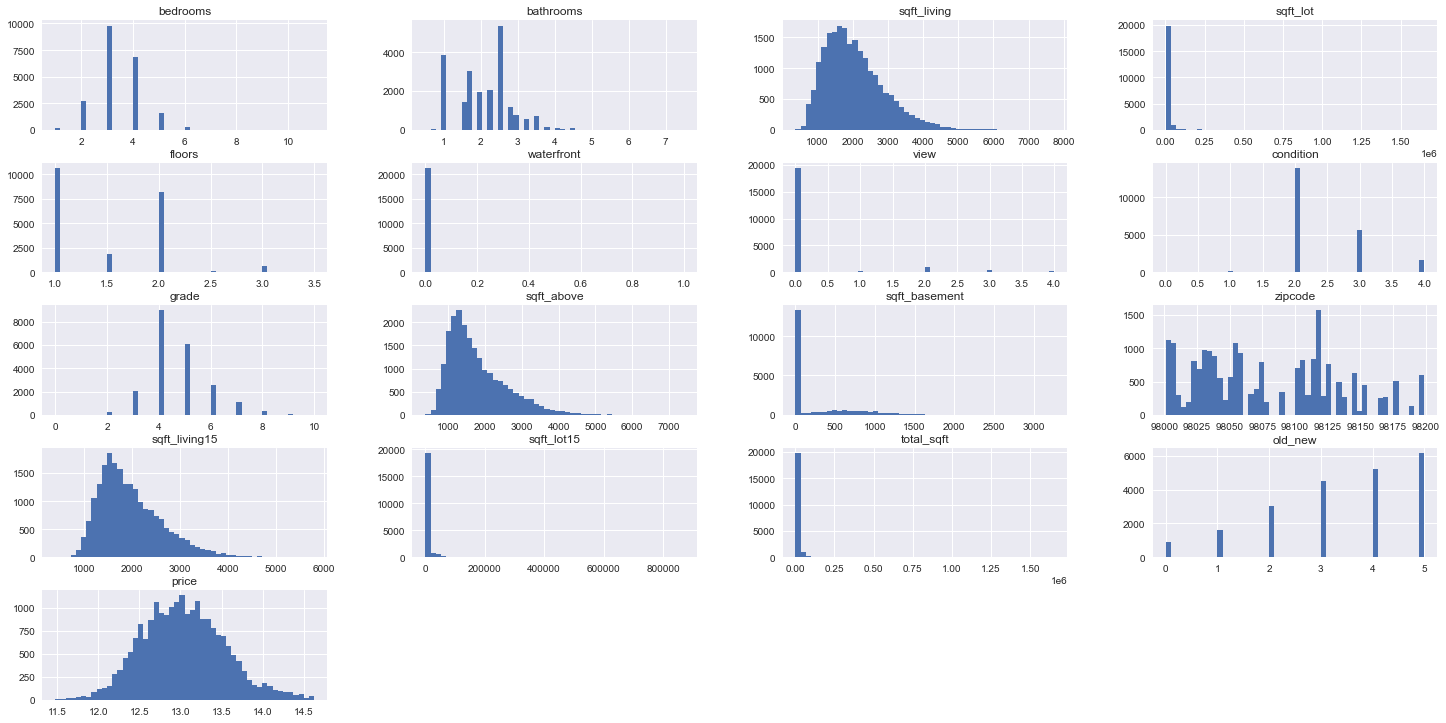

In [118]:
# plot histograms of all the columns in the set.
df_13i.hist(bins=50, figsize=(25, 12.5))

{'whiskers': [<matplotlib.lines.Line2D at 0x1df88d1d0a0>,
 'caps': [<matplotlib.lines.Line2D at 0x1df88d1d760>,
 'boxes': [<matplotlib.lines.Line2D at 0x1df88d16d00>],
 'medians': [<matplotlib.lines.Line2D at 0x1df88d1de20>],
 'fliers': [<matplotlib.lines.Line2D at 0x1df88d23190>],
 'means': []}

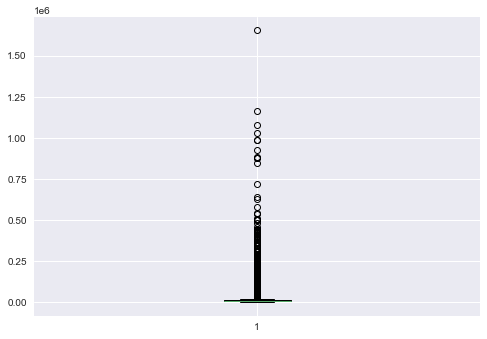

In [119]:
plt.boxplot(df_13i.total_sqft)

In [120]:
df_13i.total_sqft.describe()

count     21427.00
mean      17118.82
std       41670.55
min        1423.00
25%        7020.00
50%        9540.00
75%       12876.00
max     1652659.00
Name: total_sqft, dtype: float64

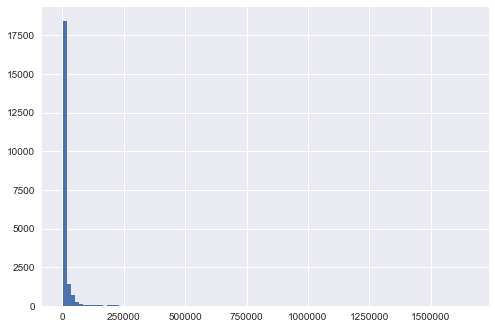

In [121]:
df_13i.total_sqft.hist(bins=100)
plt.ticklabel_format(useOffset=False, style='plain')

In [122]:
# There are some properties with a huge amount of total squarefeet in 
# comparison to others. Going to try dropping these values based off of IQR
q3, q1 = np.percentile(df_13i.total_sqft, [75 ,25])
iqr = q3 - q1

# define and drop outliers
upper_bound = q3 + 1.5 * iqr
lower_bound = q1 - 1.5 * iqr

df_13i = df_13i[(df_13i.total_sqft < upper_bound) & (df_13.total_sqft > lower_bound)]

df_13i

<ipython-input-122-623740490566>:10: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_13i = df_13i[(df_13i.total_sqft < upper_bound) & (df_13.total_sqft > lower_bound)]


bedrooms  bathrooms  sqft_living  sqft_lot  floors  waterfront  view  \
0             3       1.00         1180      5650    1.00           0     0   
1             3       2.25         2570      7242    2.00           0     0   
2             2       1.00          770     10000    1.00           0     0   
3             4       3.00         1960      5000    1.00           0     0   
4             3       2.00         1680      8080    1.00           0     0   
...         ...        ...          ...       ...     ...         ...   ...   
21592         3       2.50         1530      1131    3.00           0     0   
21593         4       2.50         2310      5813    2.00           0     0   
21594         2       0.75         1020      1350    2.00           0     0   
21595         3       2.50         1600      2388    2.00           0     0   
21596         2       0.75         1020      1076    2.00           0     0   

       condition  grade  sqft_above  sqft_basement  zipcode  sqft_living15  \
0              2      4        1180              0    98178           1340   
1              2      4        2170            400    98125           1690   
2              2      3         770              0    98028           2720   
3              4      4        1050            910    98136           1360   
4              2      5        1680              0    98074           1800   
...          ...    ...         ...            ...      ...            ...   
21592          2      5        1530              0    98103           1530   
21593          2      5        2310              0    98146           1830   
21594          2      4        1020              0    98144           1020   
21595          2      5        1600              0    98027           1410   
21596          2      4        1020              0    98144           1020   

       sqft_lot15  total_sqft  old_new  price  
0            5650     6830.00        3  12.31  
1            7639     9812.00        4  13.20  
2            8062    10770.00        1  12.10  
3            5000     6960.00        3  13.31  
4            7503     9760.00        4  13.14  
...           ...         ...      ...    ...  
21592        1509     2661.00        5  12.79  
21593        7200     8123.00        5  12.90  
21594        2007     2370.00        5  12.90  
21595        1287     3988.00        5  12.90  
21596        1357     2096.00        5  12.69  

[19059 rows x 17 columns]

Dropped around 2,000 rows

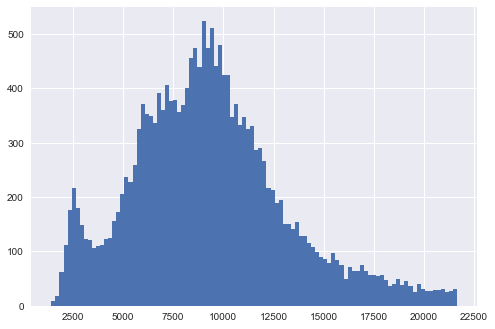

In [123]:
df_13i.total_sqft.hist(bins=100)
plt.ticklabel_format(useOffset=False, style='plain')

<AxesSubplot:xlabel='zipcode', ylabel='price'>

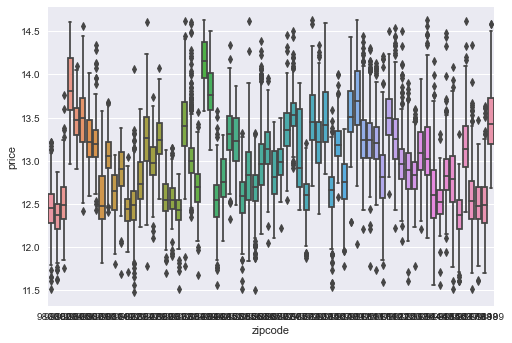

In [124]:
sns.boxplot(x=df_13i.zipcode, y=df_13i.price)

There are outliers for almost every zipcode. I will try to filter these out.

In [125]:
zip_uniques = df_13i.zipcode.unique()

In [126]:
# for each zipcode, I will need to establish upper and lower bounds to then
# filter out outliers.
for zip_c in zip_uniques:
    # create new df with current zipcode
    df_zipcode = pd.DataFrame()
    df_zipcode = df_13i[df_13i.zipcode == int(zip_c)]
    
    # find first and third quartiles
    q3, q1 = np.percentile(df_zipcode.price, [75 ,25])
    
    iqr = q3 - q1

    # define and drop outliers
    upper_bound = q3 + 1.5 * iqr
    lower_bound = q1 - 1.5 * iqr
    
    zip_d = int(zip_c)
    
    for row in df_13i.index:
        if df_13i.loc[row, 'zipcode'] == zip_d:
            if (df_13i.loc[row, 'price'] > upper_bound) |  (df_13i.loc[row, 'price'] < lower_bound):
                df_13i = df_13i.drop(labels=row, axis=0)

# df_13i = df_13i[(df_13i.total_sqft < upper_bound) & (df_13.total_sqft > lower_bound)]

df_13i

bedrooms  bathrooms  sqft_living  sqft_lot  floors  waterfront  view  \
0             3       1.00         1180      5650    1.00           0     0   
1             3       2.25         2570      7242    2.00           0     0   
3             4       3.00         1960      5000    1.00           0     0   
4             3       2.00         1680      8080    1.00           0     0   
6             3       2.25         1715      6819    2.00           0     0   
...         ...        ...          ...       ...     ...         ...   ...   
21592         3       2.50         1530      1131    3.00           0     0   
21593         4       2.50         2310      5813    2.00           0     0   
21594         2       0.75         1020      1350    2.00           0     0   
21595         3       2.50         1600      2388    2.00           0     0   
21596         2       0.75         1020      1076    2.00           0     0   

       condition  grade  sqft_above  sqft_basement  zipcode  sqft_living15  \
0              2      4        1180              0    98178           1340   
1              2      4        2170            400    98125           1690   
3              4      4        1050            910    98136           1360   
4              2      5        1680              0    98074           1800   
6              2      4        1715              0    98003           2238   
...          ...    ...         ...            ...      ...            ...   
21592          2      5        1530              0    98103           1530   
21593          2      5        2310              0    98146           1830   
21594          2      4        1020              0    98144           1020   
21595          2      5        1600              0    98027           1410   
21596          2      4        1020              0    98144           1020   

       sqft_lot15  total_sqft  old_new  price  
0            5650     6830.00        3  12.31  
1            7639     9812.00        4  13.20  
3            5000     6960.00        3  13.31  
4            7503     9760.00        4  13.14  
6            6819     8534.00        5  12.46  
...           ...         ...      ...    ...  
21592        1509     2661.00        5  12.79  
21593        7200     8123.00        5  12.90  
21594        2007     2370.00        5  12.90  
21595        1287     3988.00        5  12.90  
21596        1357     2096.00        5  12.69  

[18639 rows x 17 columns]

<AxesSubplot:xlabel='zipcode', ylabel='price'>

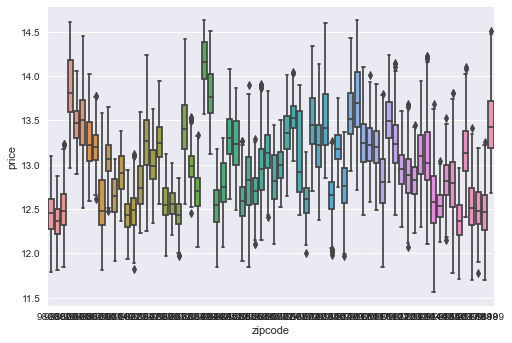

In [127]:
sns.boxplot(x=df_13i.zipcode, y=df_13i.price)

In [128]:
# check counts for each zipcode to make sure there are enough datapoints.
df_13i.zipcode.value_counts(ascending=True)

98039     25
98024     27
98070     33
98077     44
98014     51
        ... 
98118    496
98052    517
98117    542
98115    570
98103    597
Name: zipcode, Length: 70, dtype: int64

Looks like my IQR filtering is a  little bit different than Seaborn's, but my code still managed to take out most of the outliers that Seaborn plots.

<AxesSubplot:xlabel='waterfront', ylabel='price'>

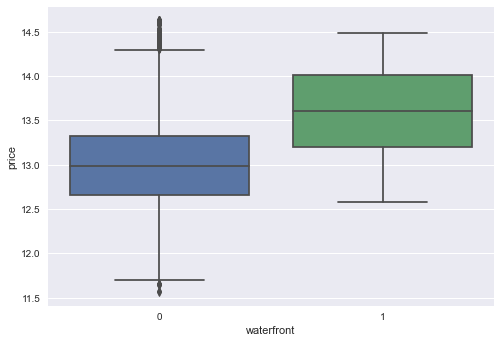

In [129]:
# explore other categorical variables
sns.boxplot(x=df_13i.waterfront, y=df_13i.price)

In [130]:
df_13i = IQR_filter_categorical('waterfront', df_13i)

<AxesSubplot:xlabel='waterfront', ylabel='price'>

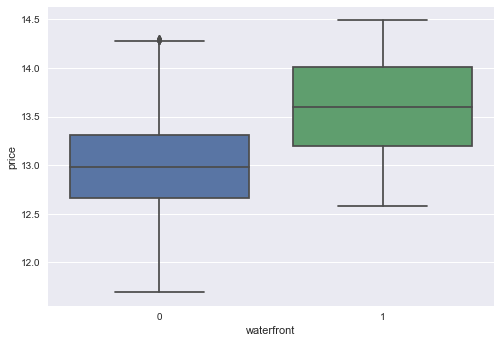

In [131]:
sns.boxplot(x=df_13i.waterfront, y=df_13i.price)

<AxesSubplot:xlabel='view', ylabel='price'>

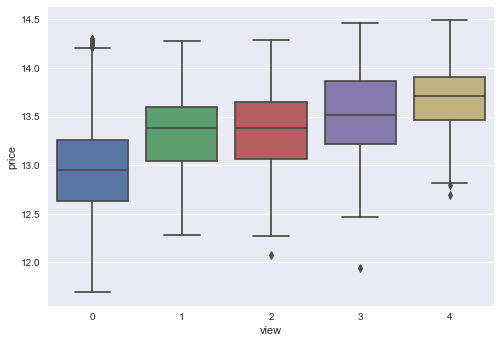

In [132]:
sns.boxplot(x=df_13i.view, y=df_13i.price)

In [133]:
df_13i = IQR_filter_categorical('view', df_13i)

In [134]:
df_13i

bedrooms  bathrooms  sqft_living  sqft_lot  floors  waterfront  view  \
0             3       1.00         1180      5650    1.00           0     0   
1             3       2.25         2570      7242    2.00           0     0   
3             4       3.00         1960      5000    1.00           0     0   
4             3       2.00         1680      8080    1.00           0     0   
6             3       2.25         1715      6819    2.00           0     0   
...         ...        ...          ...       ...     ...         ...   ...   
21592         3       2.50         1530      1131    3.00           0     0   
21593         4       2.50         2310      5813    2.00           0     0   
21594         2       0.75         1020      1350    2.00           0     0   
21595         3       2.50         1600      2388    2.00           0     0   
21596         2       0.75         1020      1076    2.00           0     0   

       condition  grade  sqft_above  sqft_basement  zipcode  sqft_living15  \
0              2      4        1180              0    98178           1340   
1              2      4        2170            400    98125           1690   
3              4      4        1050            910    98136           1360   
4              2      5        1680              0    98074           1800   
6              2      4        1715              0    98003           2238   
...          ...    ...         ...            ...      ...            ...   
21592          2      5        1530              0    98103           1530   
21593          2      5        2310              0    98146           1830   
21594          2      4        1020              0    98144           1020   
21595          2      5        1600              0    98027           1410   
21596          2      4        1020              0    98144           1020   

       sqft_lot15  total_sqft  old_new  price  
0            5650     6830.00        3  12.31  
1            7639     9812.00        4  13.20  
3            5000     6960.00        3  13.31  
4            7503     9760.00        4  13.14  
6            6819     8534.00        5  12.46  
...           ...         ...      ...    ...  
21592        1509     2661.00        5  12.79  
21593        7200     8123.00        5  12.90  
21594        2007     2370.00        5  12.90  
21595        1287     3988.00        5  12.90  
21596        1357     2096.00        5  12.69  

[18456 rows x 17 columns]

<AxesSubplot:xlabel='view', ylabel='price'>

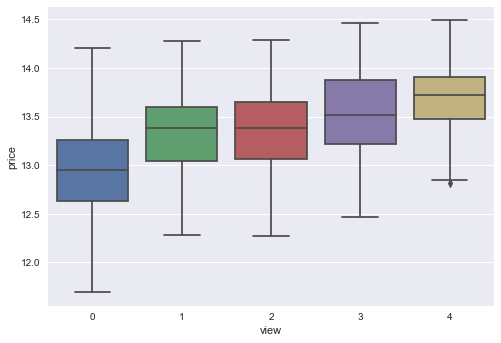

In [135]:
sns.boxplot(x=df_13i.view, y=df_13i.price)

<AxesSubplot:xlabel='condition', ylabel='price'>

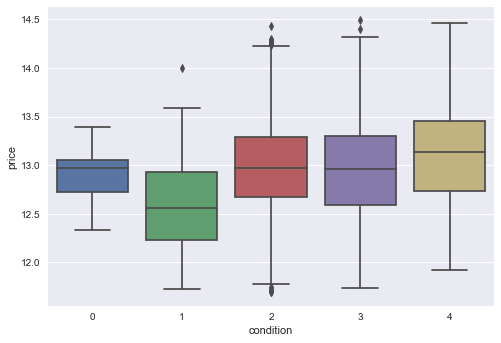

In [136]:
sns.boxplot(x=df_13i.condition, y=df_13i.price)

In [137]:
df_13i = IQR_filter_categorical('condition', df_13i)

In [138]:
df_13i = IQR_filter_categorical('grade', df_13i)

In [139]:
df_13i

bedrooms  bathrooms  sqft_living  sqft_lot  floors  waterfront  view  \
0             3       1.00         1180      5650    1.00           0     0   
1             3       2.25         2570      7242    2.00           0     0   
3             4       3.00         1960      5000    1.00           0     0   
4             3       2.00         1680      8080    1.00           0     0   
6             3       2.25         1715      6819    2.00           0     0   
...         ...        ...          ...       ...     ...         ...   ...   
21592         3       2.50         1530      1131    3.00           0     0   
21593         4       2.50         2310      5813    2.00           0     0   
21594         2       0.75         1020      1350    2.00           0     0   
21595         3       2.50         1600      2388    2.00           0     0   
21596         2       0.75         1020      1076    2.00           0     0   

       condition  grade  sqft_above  sqft_basement  zipcode  sqft_living15  \
0              2      4        1180              0    98178           1340   
1              2      4        2170            400    98125           1690   
3              4      4        1050            910    98136           1360   
4              2      5        1680              0    98074           1800   
6              2      4        1715              0    98003           2238   
...          ...    ...         ...            ...      ...            ...   
21592          2      5        1530              0    98103           1530   
21593          2      5        2310              0    98146           1830   
21594          2      4        1020              0    98144           1020   
21595          2      5        1600              0    98027           1410   
21596          2      4        1020              0    98144           1020   

       sqft_lot15  total_sqft  old_new  price  
0            5650     6830.00        3  12.31  
1            7639     9812.00        4  13.20  
3            5000     6960.00        3  13.31  
4            7503     9760.00        4  13.14  
6            6819     8534.00        5  12.46  
...           ...         ...      ...    ...  
21592        1509     2661.00        5  12.79  
21593        7200     8123.00        5  12.90  
21594        2007     2370.00        5  12.90  
21595        1287     3988.00        5  12.90  
21596        1357     2096.00        5  12.69  

[18369 rows x 17 columns]

<AxesSubplot:xlabel='old_new', ylabel='price'>

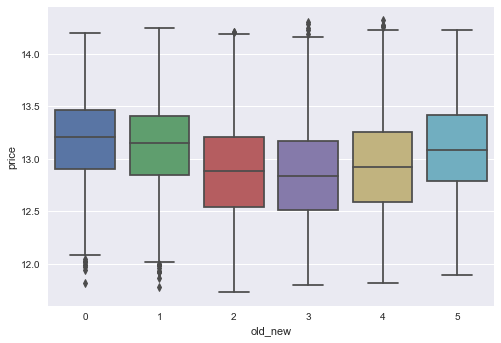

In [140]:
sns.boxplot(x=df_13i.old_new, y=df_13i.price)

In [141]:
df_13i = IQR_filter_categorical('old_new', df_13i)
df_13i

bedrooms  bathrooms  sqft_living  sqft_lot  floors  waterfront  view  \
0             3       1.00         1180      5650    1.00           0     0   
1             3       2.25         2570      7242    2.00           0     0   
3             4       3.00         1960      5000    1.00           0     0   
4             3       2.00         1680      8080    1.00           0     0   
6             3       2.25         1715      6819    2.00           0     0   
...         ...        ...          ...       ...     ...         ...   ...   
21592         3       2.50         1530      1131    3.00           0     0   
21593         4       2.50         2310      5813    2.00           0     0   
21594         2       0.75         1020      1350    2.00           0     0   
21595         3       2.50         1600      2388    2.00           0     0   
21596         2       0.75         1020      1076    2.00           0     0   

       condition  grade  sqft_above  sqft_basement  zipcode  sqft_living15  \
0              2      4        1180              0    98178           1340   
1              2      4        2170            400    98125           1690   
3              4      4        1050            910    98136           1360   
4              2      5        1680              0    98074           1800   
6              2      4        1715              0    98003           2238   
...          ...    ...         ...            ...      ...            ...   
21592          2      5        1530              0    98103           1530   
21593          2      5        2310              0    98146           1830   
21594          2      4        1020              0    98144           1020   
21595          2      5        1600              0    98027           1410   
21596          2      4        1020              0    98144           1020   

       sqft_lot15  total_sqft  old_new  price  
0            5650     6830.00        3  12.31  
1            7639     9812.00        4  13.20  
3            5000     6960.00        3  13.31  
4            7503     9760.00        4  13.14  
6            6819     8534.00        5  12.46  
...           ...         ...      ...    ...  
21592        1509     2661.00        5  12.79  
21593        7200     8123.00        5  12.90  
21594        2007     2370.00        5  12.90  
21595        1287     3988.00        5  12.90  
21596        1357     2096.00        5  12.69  

[18336 rows x 17 columns]

In [142]:
var_list = ['sqft_above', 'sqft_basement', 'sqft_living15', 'sqft_lot15',
            'total_sqft', 'sqft_lot', 'sqft_living']
df_13i = var_log_transform(var_list, df_13i)
df_13i.head()

C:\Users\samue\anaconda_3\envs\learn-env\lib\site-packages\pandas\core\series.py:726: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


bedrooms  bathrooms  floors  waterfront  view  condition  grade  zipcode  \
0         3       1.00    1.00           0     0          2      4    98178   
1         3       2.25    2.00           0     0          2      4    98125   
3         4       3.00    1.00           0     0          4      4    98136   
4         3       2.00    1.00           0     0          2      5    98074   
6         3       2.25    2.00           0     0          2      4    98003   

   old_new  price  sqft_above  sqft_basement  sqft_living15  sqft_lot15  \
0        3  12.31        7.07           -inf           7.20        8.64   
1        4  13.20        7.68           5.99           7.43        8.94   
3        3  13.31        6.96           6.81           7.22        8.52   
4        4  13.14        7.43           -inf           7.50        8.92   
6        5  12.46        7.45           -inf           7.71        8.83   

   total_sqft  sqft_lot  sqft_living  
0        8.83      8.64         7.07  
1        9.19      8.89         7.85  
3        8.85      8.52         7.58  
4        9.19      9.00         7.43  
6        9.05      8.83         7.45

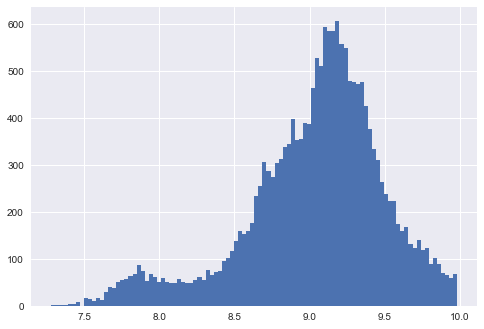

In [143]:
df_13i.total_sqft.hist(bins=100)
plt.ticklabel_format(useOffset=False, style='plain')

{'whiskers': [<matplotlib.lines.Line2D at 0x1df93de1bb0>,
 'caps': [<matplotlib.lines.Line2D at 0x1df93def2b0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1df93de1850>],
 'medians': [<matplotlib.lines.Line2D at 0x1df93def940>],
 'fliers': [<matplotlib.lines.Line2D at 0x1df93defc70>],
 'means': []}

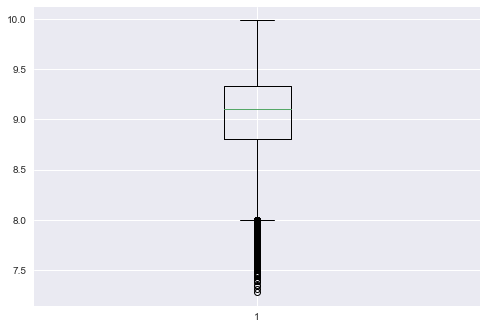

In [144]:
plt.boxplot(df_13i.total_sqft)

In [145]:
df_13i = df_13i.reset_index(drop=True)

In [146]:
# Going to drop values based off of IQR
q3, q1 = np.percentile(df_13i['total_sqft'], [75, 25])
iqr = q3 - q1

# define and drop outliers
upper_bound = q3 + 1.5 * iqr
lower_bound = q1 - 1.5 * iqr

print(upper_bound, lower_bound)

df_13i = df_13i[(df_13i['total_sqft'] > lower_bound)]

df_13i

10.130433054512302 8.00276625501398


bedrooms  bathrooms  floors  waterfront  view  condition  grade  \
0             3       1.00    1.00           0     0          2      4   
1             3       2.25    2.00           0     0          2      4   
2             4       3.00    1.00           0     0          4      4   
3             3       2.00    1.00           0     0          2      5   
4             3       2.25    2.00           0     0          2      4   
...         ...        ...     ...         ...   ...        ...    ...   
18326         3       2.50    2.00           0     0          2      5   
18328         4       2.50    2.00           0     0          2      6   
18329         4       3.50    2.00           0     0          2      6   
18332         4       2.50    2.00           0     0          2      5   
18334         3       2.50    2.00           0     0          2      5   

       zipcode  old_new  price  sqft_above  sqft_basement  sqft_living15  \
0        98178        3  12.31        7.07           -inf           7.20   
1        98125        4  13.20        7.68           5.99           7.43   
2        98136        3  13.31        6.96           6.81           7.22   
3        98074        4  13.14        7.43           -inf           7.50   
4        98003        5  12.46        7.45           -inf           7.71   
...        ...      ...    ...         ...            ...            ...   
18326    98065        5  13.14        7.73           -inf           7.73   
18328    98056        5  13.32        7.83           -inf           7.83   
18329    98136        5  13.83        7.86           6.81           7.63   
18332    98146        5  12.90        7.75           -inf           7.51   
18334    98027        5  12.90        7.38           -inf           7.25   

       sqft_lot15  total_sqft  sqft_lot  sqft_living  
0            8.64        8.83      8.64         7.07  
1            8.94        9.19      8.89         7.85  
2            8.52        8.85      8.52         7.58  
3            8.92        9.19      9.00         7.43  
4            8.83        9.05      8.83         7.45  
...           ...         ...       ...          ...  
18326        8.65        8.96      8.62         7.73  
18328        8.70        9.05      8.70         7.83  
18329        8.73        9.28      8.88         8.16  
18332        8.88        9.00      8.67         7.75  
18334        7.16        8.29      7.78         7.38  

[17474 rows x 17 columns]

{'whiskers': [<matplotlib.lines.Line2D at 0x1df93e3af40>,
 'caps': [<matplotlib.lines.Line2D at 0x1df93e47640>,
 'boxes': [<matplotlib.lines.Line2D at 0x1df93e3abe0>],
 'medians': [<matplotlib.lines.Line2D at 0x1df93e47cd0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1df94992040>],
 'means': []}

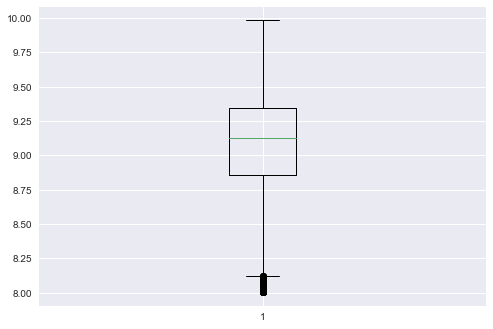

In [147]:
plt.boxplot(df_13i.total_sqft)

In [148]:
# dropping sqft_basement - don't need this anyway because it + sqft_above is
# equal to sqft_living
df_13i = df_13i.drop(['sqft_basement'], axis=1)

In [149]:
dum_list = ['waterfront', 'view', 'condition', 'grade', 'zipcode', 'old_new']
df_13i = dum_transformation(dum_list, df_13i)

#### Check linearity assumption

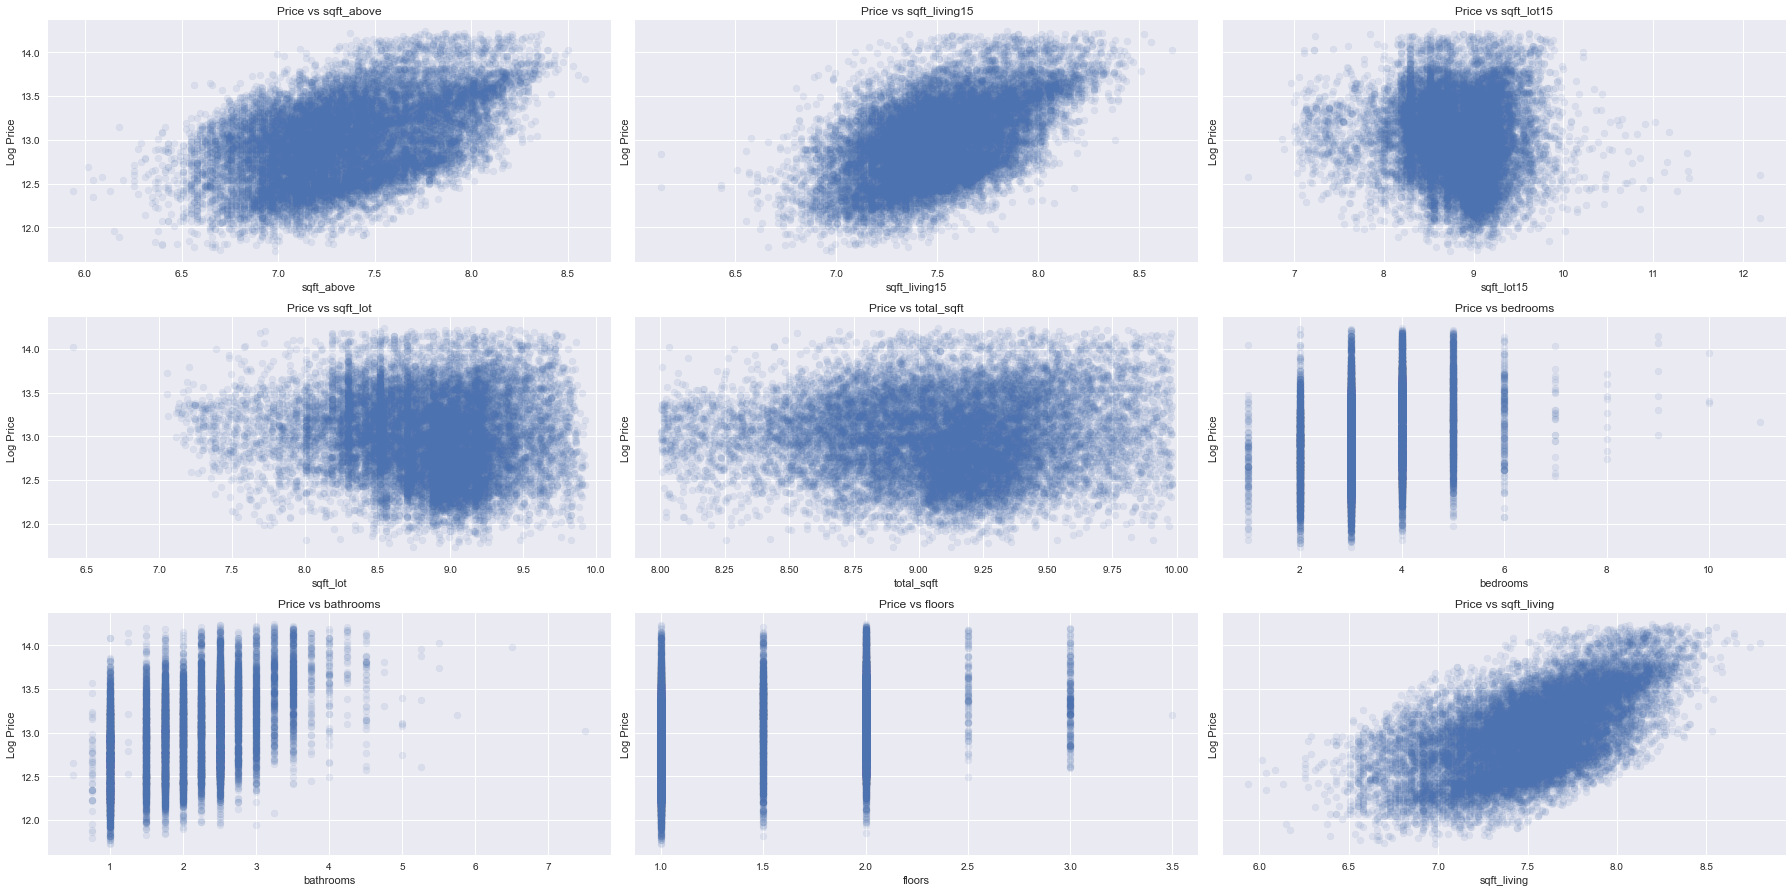

In [150]:
# visualize scatterplots of histograms with price as y variable and numerical
# variables as x variables: 'sqft_above', 'sqft_living15', 
# 'sqft_lot15','total_sqft', bedrooms, bathrooms, floors

numericals = ['sqft_above', 'sqft_living15', 'sqft_lot15', 'sqft_lot',
              'total_sqft', 'bedrooms', 'bathrooms', 'floors', 'sqft_living']

fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(25, 12.5), sharey=True)

for ax, column in zip(axes.flatten(), numericals):
    ax.scatter(df_13i[column], df_13i['price'], label=column, alpha=.1)
    ax.set_title(f'Price vs {column}')
    ax.set_xlabel(column)
    ax.set_ylabel('Log Price')

fig.tight_layout()

Observations: doesn't really seem like sqft_lot15 or floors are linearly related with price. Floors doesn't either. sqft_lot, bedrooms, and total_sqft may be very roughly linearly related with price.

In [151]:
# safe to remove floors due to lack of linearity
df_13i = df_13i.drop(['floors'], axis=1)

#### Remove very highly correlating features

In [152]:
# adapting code from lab: https://github.com/learn-co-curriculum/dsc-multicollinearity-of-features-lab/tree/solution

df_mc = df_13i.corr().abs().stack().reset_index().sort_values(0, ascending=False)

df_mc['pairs'] = list(zip(df_mc.level_0, df_mc.level_1))
df_mc.set_index(['pairs'], inplace = True)

df_mc.drop(columns=['level_1', 'level_0'], inplace = True)

# cc for correlation coefficient
df_mc.columns = ['cc']

df_mc.drop_duplicates(inplace=True)

# lower bound of .75 to avoid multicollinearity
df_mc[(df_mc.cc>.75) & (df_mc.cc<1)] 

cc
pairs                          
(total_sqft, sqft_lot)     0.97
(sqft_lot15, sqft_lot)     0.87
(total_sqft, sqft_lot15)   0.84
(sqft_above, sqft_living)  0.83
(condition_3, condition_2) 0.81
(bathrooms, sqft_living)   0.76

Dropping variables with high correlation values

In [153]:
to_drop = ['sqft_lot', 'sqft_lot15', 'sqft_living', 'condition_2']
for var in to_drop:
       df_13i = df_13i.drop([var], axis=1)
df_13i.describe()

bedrooms  bathrooms    price  sqft_above  sqft_living15  total_sqft  \
count  17474.00   17474.00 17474.00    17474.00       17474.00    17474.00   
mean       3.38       2.04    12.99        7.36           7.51        9.09   
std        0.88       0.71     0.46        0.39           0.30        0.38   
min        1.00       0.50    11.73        5.94           6.13        8.00   
25%        3.00       1.50    12.65        7.07           7.30        8.85   
50%        3.00       2.00    12.98        7.33           7.50        9.12   
75%        4.00       2.50    13.32        7.64           7.71        9.34   
max       11.00       7.50    14.24        8.59           8.66        9.98   

       waterfront_1   view_1   view_2   view_3  ...  zipcode_98177  \
count      17474.00 17474.00 17474.00 17474.00  ...       17474.00   
mean           0.00     0.01     0.04     0.02  ...           0.01   
std            0.03     0.12     0.20     0.13  ...           0.11   
min            0.00     0.00     0.00     0.00  ...           0.00   
25%            0.00     0.00     0.00     0.00  ...           0.00   
50%            0.00     0.00     0.00     0.00  ...           0.00   
75%            0.00     0.00     0.00     0.00  ...           0.00   
max            1.00     1.00     1.00     1.00  ...           1.00   

       zipcode_98178  zipcode_98188  zipcode_98198  zipcode_98199  old_new_1  \
count       17474.00       17474.00       17474.00       17474.00   17474.00   
mean            0.01           0.01           0.01           0.02       0.09   
std             0.12           0.08           0.12           0.12       0.28   
min             0.00           0.00           0.00           0.00       0.00   
25%             0.00           0.00           0.00           0.00       0.00   
50%             0.00           0.00           0.00           0.00       0.00   
75%             0.00           0.00           0.00           0.00       0.00   
max             1.00           1.00           1.00           1.00       1.00   

       old_new_2  old_new_3  old_new_4  old_new_5  
count   17474.00   17474.00   17474.00   17474.00  
mean        0.15       0.23       0.23       0.26  
std         0.36       0.42       0.42       0.44  
min         0.00       0.00       0.00       0.00  
25%         0.00       0.00       0.00       0.00  
50%         0.00       0.00       0.00       0.00  
75%         0.00       0.00       0.00       1.00  
max         1.00       1.00       1.00       1.00  

[8 rows x 97 columns]

#### Model

In [154]:
res, X, df_y, df_x, df_train_x, df_train_y = sm_lin_model(df_13i)
print(str(res.summary()))

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.874
Model:                            OLS   Adj. R-squared:                  0.873
Method:                 Least Squares   F-statistic:                     940.0
Date:                Sat, 30 Apr 2022   Prob (F-statistic):               0.00
Time:                        22:55:04   Log-Likelihood:                 5204.7
No. Observations:               13105   AIC:                        -1.022e+04
Df Residuals:                   13008   BIC:                            -9490.
Df Model:                          96                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             8.6500      0.180     48.101

#### Check assumptions

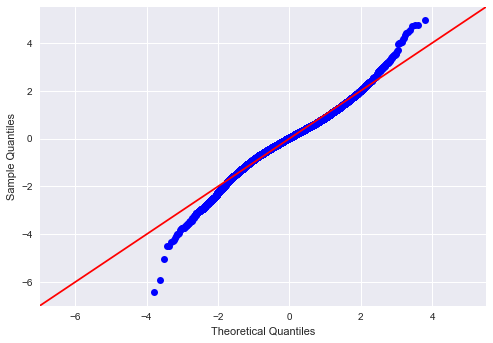

In [155]:
sm_check_resid_normality(res)

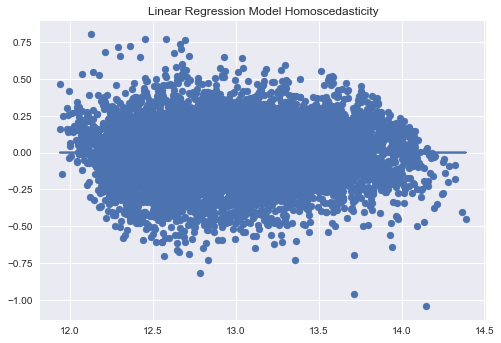

In [156]:
sm_check_scedas(res, df_train_y, X)

In [157]:
multicollinearity_check(df_x)

[('bedrooms', 26.612462481497587),
 ('bathrooms', 25.744219930265736),
 ('sqft_above', 1251.7934810034283),
 ('sqft_living15', 1638.38851371652),
 ('total_sqft', 1285.4264282884265),
 ('waterfront_1', 1.209235746714977),
 ('view_1', 1.06862352511587),
 ('view_2', 1.1440382625205054),
 ('view_3', 1.0983366218386195),
 ('view_4', 1.1745003286181348),
 ('condition_1', 1.0348917322747158),
 ('condition_3', 1.8517279647014595),
 ('condition_4', 1.3582274712921385),
 ('grade_1', 2.6679962413879803),
 ('grade_2', 20.516086307976096),
 ('grade_3', 231.771847675816),
 ('grade_4', 1091.1463958861978),
 ('grade_5', 677.4169134268952),
 ('grade_6', 277.2397271630677),
 ('grade_7', 90.50308009552342),
 ('grade_8', 18.62907653108017),
 ('grade_9', 2.2799675040983858),
 ('zipcode_98002', 1.6531139095208236),
 ('zipcode_98003', 1.8828635131434486),
 ('zipcode_98004', 1.6283964456015172),
 ('zipcode_98005', 1.4339406468361087),
 ('zipcode_98006', 2.506876725210402),
 ('zipcode_98007', 1.475272637436969

#### Post-model feature elimination

In [158]:
# adapting code from lab: https://github.com/learn-co-curriculum/dsc-multicollinearity-of-features-lab/tree/solution

df_mc = df_13i.corr().abs().stack().reset_index().sort_values(0, ascending=False)

df_mc['pairs'] = list(zip(df_mc.level_0, df_mc.level_1))
df_mc.set_index(['pairs'], inplace = True)

df_mc.drop(columns=['level_1', 'level_0'], inplace = True)

# cc for correlation coefficient
df_mc.columns = ['cc']

df_mc.drop_duplicates(inplace=True)

# Conservative lower bound of .5 to avoid multicollinearity
df_mc[(df_mc.cc>.5) & (df_mc.cc<1)] 

cc
pairs                           
(sqft_above, sqft_living15) 0.68
(sqft_above, bathrooms)     0.68
(grade_4, grade_5)          0.57
(bathrooms, sqft_living15)  0.57
(sqft_living15, price)      0.54
(bedrooms, bathrooms)       0.52
(bedrooms, sqft_above)      0.50
(sqft_above, old_new_5)     0.50

In [159]:
# drop variables that have high correlation with each other
to_drop = ['grade_4', 'sqft_above', 'sqft_living15', 'bedrooms']
for var in to_drop:
       df_13i = df_13i.drop([var], axis=1)
df_13i.describe()

bathrooms    price  total_sqft  waterfront_1   view_1   view_2  \
count   17474.00 17474.00    17474.00      17474.00 17474.00 17474.00   
mean        2.04    12.99        9.09          0.00     0.01     0.04   
std         0.71     0.46        0.38          0.03     0.12     0.20   
min         0.50    11.73        8.00          0.00     0.00     0.00   
25%         1.50    12.65        8.85          0.00     0.00     0.00   
50%         2.00    12.98        9.12          0.00     0.00     0.00   
75%         2.50    13.32        9.34          0.00     0.00     0.00   
max         7.50    14.24        9.98          1.00     1.00     1.00   

        view_3   view_4  condition_1  condition_3  ...  zipcode_98177  \
count 17474.00 17474.00     17474.00     17474.00  ...       17474.00   
mean      0.02     0.01         0.01         0.27  ...           0.01   
std       0.13     0.07         0.08         0.45  ...           0.11   
min       0.00     0.00         0.00         0.00  ...           0.00   
25%       0.00     0.00         0.00         0.00  ...           0.00   
50%       0.00     0.00         0.00         0.00  ...           0.00   
75%       0.00     0.00         0.00         1.00  ...           0.00   
max       1.00     1.00         1.00         1.00  ...           1.00   

       zipcode_98178  zipcode_98188  zipcode_98198  zipcode_98199  old_new_1  \
count       17474.00       17474.00       17474.00       17474.00   17474.00   
mean            0.01           0.01           0.01           0.02       0.09   
std             0.12           0.08           0.12           0.12       0.28   
min             0.00           0.00           0.00           0.00       0.00   
25%             0.00           0.00           0.00           0.00       0.00   
50%             0.00           0.00           0.00           0.00       0.00   
75%             0.00           0.00           0.00           0.00       0.00   
max             1.00           1.00           1.00           1.00       1.00   

       old_new_2  old_new_3  old_new_4  old_new_5  
count   17474.00   17474.00   17474.00   17474.00  
mean        0.15       0.23       0.23       0.26  
std         0.36       0.42       0.42       0.44  
min         0.00       0.00       0.00       0.00  
25%         0.00       0.00       0.00       0.00  
50%         0.00       0.00       0.00       0.00  
75%         0.00       0.00       0.00       1.00  
max         1.00       1.00       1.00       1.00  

[8 rows x 93 columns]

#### Model

In [160]:
res, X, df_y, df_x, df_train_x, df_train_y = sm_lin_model(df_13i)
print(str(res.summary()))

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.857
Model:                            OLS   Adj. R-squared:                  0.856
Method:                 Least Squares   F-statistic:                     849.8
Date:                Sat, 30 Apr 2022   Prob (F-statistic):               0.00
Time:                        22:55:35   Log-Likelihood:                 4389.7
No. Observations:               13105   AIC:                            -8593.
Df Residuals:                   13012   BIC:                            -7898.
Df Model:                          92                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            10.4039      0.055    190.762

In [161]:
multicollinearity_check(df_x)

[('bathrooms', 19.971407996009848),
 ('total_sqft', 93.48933233836199),
 ('waterfront_1', 1.2085205662014047),
 ('view_1', 1.0575698029192022),
 ('view_2', 1.1221463173507435),
 ('view_3', 1.0835942239181875),
 ('view_4', 1.1671154864387503),
 ('condition_1', 1.0346422427066555),
 ('condition_3', 1.8473153205950694),
 ('condition_4', 1.3521363869440952),
 ('grade_1', 1.0229940664847328),
 ('grade_2', 1.0883781365127903),
 ('grade_3', 1.5008036586405042),
 ('grade_5', 2.0799147719273012),
 ('grade_6', 1.7868497528690097),
 ('grade_7', 1.4434194592445602),
 ('grade_8', 1.1284678846955682),
 ('grade_9', 1.0298640820715612),
 ('zipcode_98002', 1.5966390728173792),
 ('zipcode_98003', 1.8320753651483799),
 ('zipcode_98004', 1.5898035854797894),
 ('zipcode_98005', 1.4107688950074533),
 ('zipcode_98006', 2.41919292424471),
 ('zipcode_98007', 1.4376814808664753),
 ('zipcode_98008', 1.830339495655911),
 ('zipcode_98010', 1.1768508715735735),
 ('zipcode_98011', 1.5832322207543639),
 ('zipcode_980

#### Post-model feature elim.

In [162]:
# total sqft has the highest mc score... going to drop this
df_13i = df_13i.drop(['total_sqft'], axis=1)
df_13i

bathrooms  price  waterfront_1  view_1  view_2  view_3  view_4  \
0           1.00  12.31             0       0       0       0       0   
1           2.25  13.20             0       0       0       0       0   
2           3.00  13.31             0       0       0       0       0   
3           2.00  13.14             0       0       0       0       0   
4           2.25  12.46             0       0       0       0       0   
...          ...    ...           ...     ...     ...     ...     ...   
18326       2.50  13.14             0       0       0       0       0   
18328       2.50  13.32             0       0       0       0       0   
18329       3.50  13.83             0       0       0       0       0   
18332       2.50  12.90             0       0       0       0       0   
18334       2.50  12.90             0       0       0       0       0   

       condition_1  condition_3  condition_4  ...  zipcode_98177  \
0                0            0            0  ...              0   
1                0            0            0  ...              0   
2                0            0            1  ...              0   
3                0            0            0  ...              0   
4                0            0            0  ...              0   
...            ...          ...          ...  ...            ...   
18326            0            0            0  ...              0   
18328            0            0            0  ...              0   
18329            0            0            0  ...              0   
18332            0            0            0  ...              0   
18334            0            0            0  ...              0   

       zipcode_98178  zipcode_98188  zipcode_98198  zipcode_98199  old_new_1  \
0                  1              0              0              0          0   
1                  0              0              0              0          0   
2                  0              0              0              0          0   
3                  0              0              0              0          0   
4                  0              0              0              0          0   
...              ...            ...            ...            ...        ...   
18326              0              0              0              0          0   
18328              0              0              0              0          0   
18329              0              0              0              0          0   
18332              0              0              0              0          0   
18334              0              0              0              0          0   

       old_new_2  old_new_3  old_new_4  old_new_5  
0              0          1          0          0  
1              0          0          1          0  
2              0          1          0          0  
3              0          0          1          0  
4              0          0          0          1  
...          ...        ...        ...        ...  
18326          0          0          0          1  
18328          0          0          0          1  
18329          0          0          0          1  
18332          0          0          0          1  
18334          0          0          0          1  

[17474 rows x 92 columns]

#### Model

In [163]:
res, X, df_y, df_x, df_train_x, df_train_y = sm_lin_model(df_13i)
print(str(res.summary()))

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.844
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     772.4
Date:                Sat, 30 Apr 2022   Prob (F-statistic):               0.00
Time:                        22:56:01   Log-Likelihood:                 3795.4
No. Observations:               13105   AIC:                            -7407.
Df Residuals:                   13013   BIC:                            -6719.
Df Model:                          91                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            12.2435      0.016    763.436

In [164]:
multicollinearity_check(df_x)

[('bathrooms', 17.85953661474775),
 ('waterfront_1', 1.2084331752431674),
 ('view_1', 1.0575171354995316),
 ('view_2', 1.1221275280720784),
 ('view_3', 1.0835181008857733),
 ('view_4', 1.1667667297685063),
 ('condition_1', 1.0325908551081846),
 ('condition_3', 1.819440009998665),
 ('condition_4', 1.3459167380400776),
 ('grade_1', 1.0225833629270105),
 ('grade_2', 1.082671901049752),
 ('grade_3', 1.4624445385748048),
 ('grade_5', 2.077752973883933),
 ('grade_6', 1.786579733440846),
 ('grade_7', 1.4429598125236285),
 ('grade_8', 1.128402480046034),
 ('grade_9', 1.0298301246630084),
 ('zipcode_98002', 1.282672831262719),
 ('zipcode_98003', 1.3815917028231521),
 ('zipcode_98004', 1.272392760694329),
 ('zipcode_98005', 1.2126774803546816),
 ('zipcode_98006', 1.717439910050921),
 ('zipcode_98007', 1.2179760690029175),
 ('zipcode_98008', 1.4264146386912617),
 ('zipcode_98010', 1.0810765710976424),
 ('zipcode_98011', 1.2699704137509025),
 ('zipcode_98014', 1.0755555473509342),
 ('zipcode_98019

#### Post-model feature selection

In [165]:
# Drop sqft_above, sqft_living15
to_drop = ['bathrooms']
for var in to_drop:
       df_13i = df_13i.drop([var], axis=1)
df_13i.describe()

price  waterfront_1   view_1   view_2   view_3   view_4  condition_1  \
count 17474.00      17474.00 17474.00 17474.00 17474.00 17474.00     17474.00   
mean     12.99          0.00     0.01     0.04     0.02     0.01         0.01   
std       0.46          0.03     0.12     0.20     0.13     0.07         0.08   
min      11.73          0.00     0.00     0.00     0.00     0.00         0.00   
25%      12.65          0.00     0.00     0.00     0.00     0.00         0.00   
50%      12.98          0.00     0.00     0.00     0.00     0.00         0.00   
75%      13.32          0.00     0.00     0.00     0.00     0.00         0.00   
max      14.24          1.00     1.00     1.00     1.00     1.00         1.00   

       condition_3  condition_4  grade_1  ...  zipcode_98177  zipcode_98178  \
count     17474.00     17474.00 17474.00  ...       17474.00       17474.00   
mean          0.27         0.08     0.00  ...           0.01           0.01   
std           0.45         0.28     0.03  ...           0.11           0.12   
min           0.00         0.00     0.00  ...           0.00           0.00   
25%           0.00         0.00     0.00  ...           0.00           0.00   
50%           0.00         0.00     0.00  ...           0.00           0.00   
75%           1.00         0.00     0.00  ...           0.00           0.00   
max           1.00         1.00     1.00  ...           1.00           1.00   

       zipcode_98188  zipcode_98198  zipcode_98199  old_new_1  old_new_2  \
count       17474.00       17474.00       17474.00   17474.00   17474.00   
mean            0.01           0.01           0.02       0.09       0.15   
std             0.08           0.12           0.12       0.28       0.36   
min             0.00           0.00           0.00       0.00       0.00   
25%             0.00           0.00           0.00       0.00       0.00   
50%             0.00           0.00           0.00       0.00       0.00   
75%             0.00           0.00           0.00       0.00       0.00   
max             1.00           1.00           1.00       1.00       1.00   

       old_new_3  old_new_4  old_new_5  
count   17474.00   17474.00   17474.00  
mean        0.23       0.23       0.26  
std         0.42       0.42       0.44  
min         0.00       0.00       0.00  
25%         0.00       0.00       0.00  
50%         0.00       0.00       0.00  
75%         0.00       0.00       1.00  
max         1.00       1.00       1.00  

[8 rows x 91 columns]

#### Model

In [166]:
res, X, df_y, df_x, df_train_x, df_train_y = sm_lin_model(df_13i)
print(str(res.summary()))

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.826
Model:                            OLS   Adj. R-squared:                  0.825
Method:                 Least Squares   F-statistic:                     685.2
Date:                Sat, 30 Apr 2022   Prob (F-statistic):               0.00
Time:                        22:56:27   Log-Likelihood:                 3079.8
No. Observations:               13105   AIC:                            -5978.
Df Residuals:                   13014   BIC:                            -5297.
Df Model:                          90                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            12.4249      0.016    767.024

In [167]:
multicollinearity_check(df_x)

[('waterfront_1', 1.2077165569736557),
 ('view_1', 1.055686891920714),
 ('view_2', 0.3098005244136664),
 ('view_3', 0.14610179844220683),
 ('view_4', 1.1657745580386816),
 ('condition_1', 1.032498515077283),
 ('condition_3', 0.05947984825112283),
 ('condition_4', 0.16989916117052034),
 ('grade_1', 1.0219453323621157),
 ('grade_2', 1.080839674958182),
 ('grade_3', 0.1893164892451629),
 ('grade_5', 0.09247274465310187),
 ('grade_6', 0.09126160086432551),
 ('grade_7', 0.1940047807762267),
 ('grade_8', 1.1064903247494569),
 ('grade_9', 1.0279679126316659),
 ('zipcode_98002', 1.240048556941388),
 ('zipcode_98003', 0.010346979250506361),
 ('zipcode_98004', 1.2304097688819728),
 ('zipcode_98005', 1.1830742065880973),
 ('zipcode_98006', 0.6128062954398626),
 ('zipcode_98007', 1.190690168834267),
 ('zipcode_98008', 1.368419605430337),
 ('zipcode_98010', 1.074914937886522),
 ('zipcode_98011', 1.2292522727363093),
 ('zipcode_98014', 1.0702282537272116),
 ('zipcode_98019', 1.179272364604905),
 ('z

In [168]:
# drop variables that have too high of p-value
to_drop = ['zipcode_98002', 'zipcode_98003', 'zipcode_98022', 'zipcode_98023',
          'zipcode_98032', 'zipcode_98092', 'old_new_1']
for var in to_drop:
       df_13i = df_13i.drop([var], axis=1)
df_13i.describe()

price  waterfront_1   view_1   view_2   view_3   view_4  condition_1  \
count 17474.00      17474.00 17474.00 17474.00 17474.00 17474.00     17474.00   
mean     12.99          0.00     0.01     0.04     0.02     0.01         0.01   
std       0.46          0.03     0.12     0.20     0.13     0.07         0.08   
min      11.73          0.00     0.00     0.00     0.00     0.00         0.00   
25%      12.65          0.00     0.00     0.00     0.00     0.00         0.00   
50%      12.98          0.00     0.00     0.00     0.00     0.00         0.00   
75%      13.32          0.00     0.00     0.00     0.00     0.00         0.00   
max      14.24          1.00     1.00     1.00     1.00     1.00         1.00   

       condition_3  condition_4  grade_1  ...  zipcode_98168  zipcode_98177  \
count     17474.00     17474.00 17474.00  ...       17474.00       17474.00   
mean          0.27         0.08     0.00  ...           0.01           0.01   
std           0.45         0.28     0.03  ...           0.11           0.11   
min           0.00         0.00     0.00  ...           0.00           0.00   
25%           0.00         0.00     0.00  ...           0.00           0.00   
50%           0.00         0.00     0.00  ...           0.00           0.00   
75%           1.00         0.00     0.00  ...           0.00           0.00   
max           1.00         1.00     1.00  ...           1.00           1.00   

       zipcode_98178  zipcode_98188  zipcode_98198  zipcode_98199  old_new_2  \
count       17474.00       17474.00       17474.00       17474.00   17474.00   
mean            0.01           0.01           0.01           0.02       0.15   
std             0.12           0.08           0.12           0.12       0.36   
min             0.00           0.00           0.00           0.00       0.00   
25%             0.00           0.00           0.00           0.00       0.00   
50%             0.00           0.00           0.00           0.00       0.00   
75%             0.00           0.00           0.00           0.00       0.00   
max             1.00           1.00           1.00           1.00       1.00   

       old_new_3  old_new_4  old_new_5  
count   17474.00   17474.00   17474.00  
mean        0.23       0.23       0.26  
std         0.42       0.42       0.44  
min         0.00       0.00       0.00  
25%         0.00       0.00       0.00  
50%         0.00       0.00       0.00  
75%         0.00       0.00       1.00  
max         1.00       1.00       1.00  

[8 rows x 84 columns]

In [169]:
res, X, df_y, df_x, df_train_x, df_train_y = sm_lin_model(df_13i)
print(str(res.summary()))

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.826
Model:                            OLS   Adj. R-squared:                  0.825
Method:                 Least Squares   F-statistic:                     743.2
Date:                Sat, 30 Apr 2022   Prob (F-statistic):               0.00
Time:                        22:56:57   Log-Likelihood:                 3077.9
No. Observations:               13105   AIC:                            -5988.
Df Residuals:                   13021   BIC:                            -5359.
Df Model:                          83                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            12.4206      0.009   1360.051

In [170]:
multicollinearity_check(df_x)

[('waterfront_1', 1.2076527372596668),
 ('view_1', 1.0552348023255842),
 ('view_2', 0.3091365976511115),
 ('view_3', 0.14589106666789603),
 ('view_4', 1.165171855965905),
 ('condition_1', 1.0295348819033991),
 ('condition_3', 0.0548677447120394),
 ('condition_4', 0.16257165886603178),
 ('grade_1', 1.0214171745706382),
 ('grade_2', 1.0655712696234112),
 ('grade_3', 0.17948938597902256),
 ('grade_5', 0.09106157734444634),
 ('grade_6', 0.09071487924630064),
 ('grade_7', 0.19363674148156326),
 ('grade_8', 1.1059629090418892),
 ('grade_9', 1.0277636202781875),
 ('zipcode_98004', 1.0824904575476815),
 ('zipcode_98005', 1.0714707090368543),
 ('zipcode_98006', 0.46853067760116324),
 ('zipcode_98007', 1.0670693765022221),
 ('zipcode_98008', 1.1376122095577437),
 ('zipcode_98010', 1.0302381595429677),
 ('zipcode_98011', 1.0706049592508753),
 ('zipcode_98014', 1.027768416034663),
 ('zipcode_98019', 1.0630451140483343),
 ('zipcode_98024', 1.0130149894671623),
 ('zipcode_98027', 1.110401766212187),

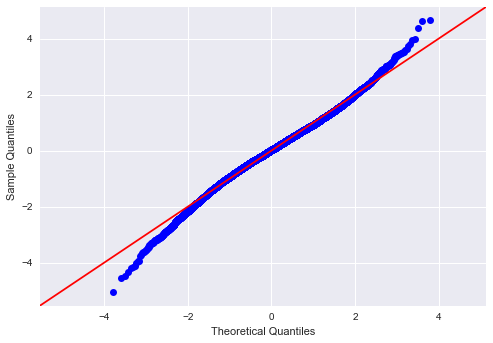

In [171]:
sm_check_resid_normality(res)

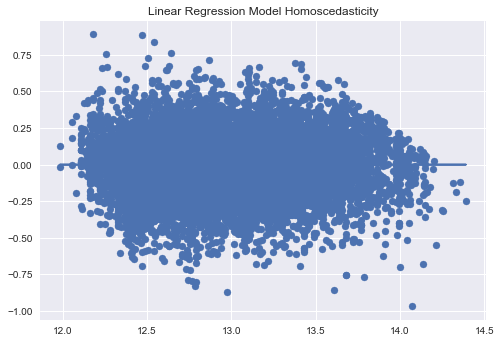

In [172]:
sm_check_scedas(res, df_train_y, X)

In [173]:
# generate predictions
ypred = res.predict(X)

z = np.exp(df_train_y['price'])
z1 = np.exp(ypred)

mae = meanabs
mae = mae(z, z1)
mae

71259.2037686064

### Model 7

Preprocessing in similar way as Model 6

#### Initial Pre-processing

In [174]:
df_m = df.copy()
# dropping some variables that are not needed.
to_drop = ['yr_built', 'yr_renovated', 'lat', 'long']

for col in to_drop:
    df_m = df_m.drop([col], axis=1)
    
# remove the outlier of 33 bedrooms
df_m = df_m[df_m['bedrooms'] < 32]

df_m

price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  \
0     221900.00         3       1.00         1180      5650    1.00   
1     538000.00         3       2.25         2570      7242    2.00   
2     180000.00         2       1.00          770     10000    1.00   
3     604000.00         4       3.00         1960      5000    1.00   
4     510000.00         3       2.00         1680      8080    1.00   
...         ...       ...        ...          ...       ...     ...   
21592 360000.00         3       2.50         1530      1131    3.00   
21593 400000.00         4       2.50         2310      5813    2.00   
21594 402101.00         2       0.75         1020      1350    2.00   
21595 400000.00         3       2.50         1600      2388    2.00   
21596 325000.00         2       0.75         1020      1076    2.00   

       waterfront  view  condition  grade  sqft_above  sqft_basement  zipcode  \
0               0     0          2      4        1180              0    98178   
1               0     0          2      4        2170            400    98125   
2               0     0          2      3         770              0    98028   
3               0     0          4      4        1050            910    98136   
4               0     0          2      5        1680              0    98074   
...           ...   ...        ...    ...         ...            ...      ...   
21592           0     0          2      5        1530              0    98103   
21593           0     0          2      5        2310              0    98146   
21594           0     0          2      4        1020              0    98144   
21595           0     0          2      5        1600              0    98027   
21596           0     0          2      4        1020              0    98144   

       sqft_living15  sqft_lot15  
0               1340        5650  
1               1690        7639  
2               2720        8062  
3               1360        5000  
4               1800        7503  
...              ...         ...  
21592           1530        1509  
21593           1830        7200  
21594           1020        2007  
21595           1410        1287  
21596           1020        1357  

[21596 rows x 15 columns]

{'whiskers': [<matplotlib.lines.Line2D at 0x1df93d8a610>,
 'caps': [<matplotlib.lines.Line2D at 0x1df93d8acd0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1df93d8a2b0>],
 'medians': [<matplotlib.lines.Line2D at 0x1df93d7b3d0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1df93d7b730>],
 'means': []}

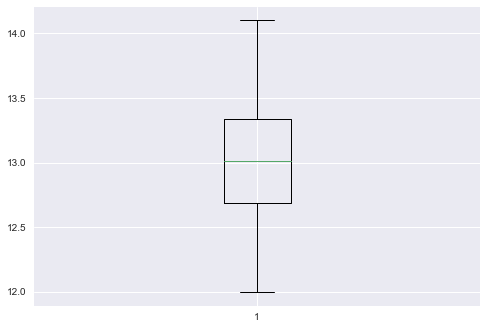

In [175]:
# log-normalize price to then drop outliers
price_log = np.log(df_m['price'])
df_m = df_m.drop(['price'], axis=1)
df_m['price'] = price_log


# drop rows in df based on price z-score - using z-score because of norm distr.
# dropping values outside two standard deviations above and below (removes 
# about 5% of the most extreme values).
max_price = df_m.price.mean() + (2*df_m.price.std())
min_price = df_m.price.mean() - (2*df_m.price.std())

df_m = df_m[(df_m.price < max_price) & (df_m.price > min_price)]

plt.boxplot(df_m.price)

array([[<AxesSubplot:title={'center':'bedrooms'}>,
        <AxesSubplot:title={'center':'bathrooms'}>,
        <AxesSubplot:title={'center':'sqft_living'}>,
        <AxesSubplot:title={'center':'sqft_lot'}>],
       [<AxesSubplot:title={'center':'floors'}>,
        <AxesSubplot:title={'center':'waterfront'}>,
        <AxesSubplot:title={'center':'view'}>,
        <AxesSubplot:title={'center':'condition'}>],
       [<AxesSubplot:title={'center':'grade'}>,
        <AxesSubplot:title={'center':'sqft_above'}>,
        <AxesSubplot:title={'center':'sqft_basement'}>,
        <AxesSubplot:title={'center':'zipcode'}>],
       [<AxesSubplot:title={'center':'sqft_living15'}>,
        <AxesSubplot:title={'center':'sqft_lot15'}>,
        <AxesSubplot:title={'center':'price'}>, <AxesSubplot:>]],
      dtype=object)

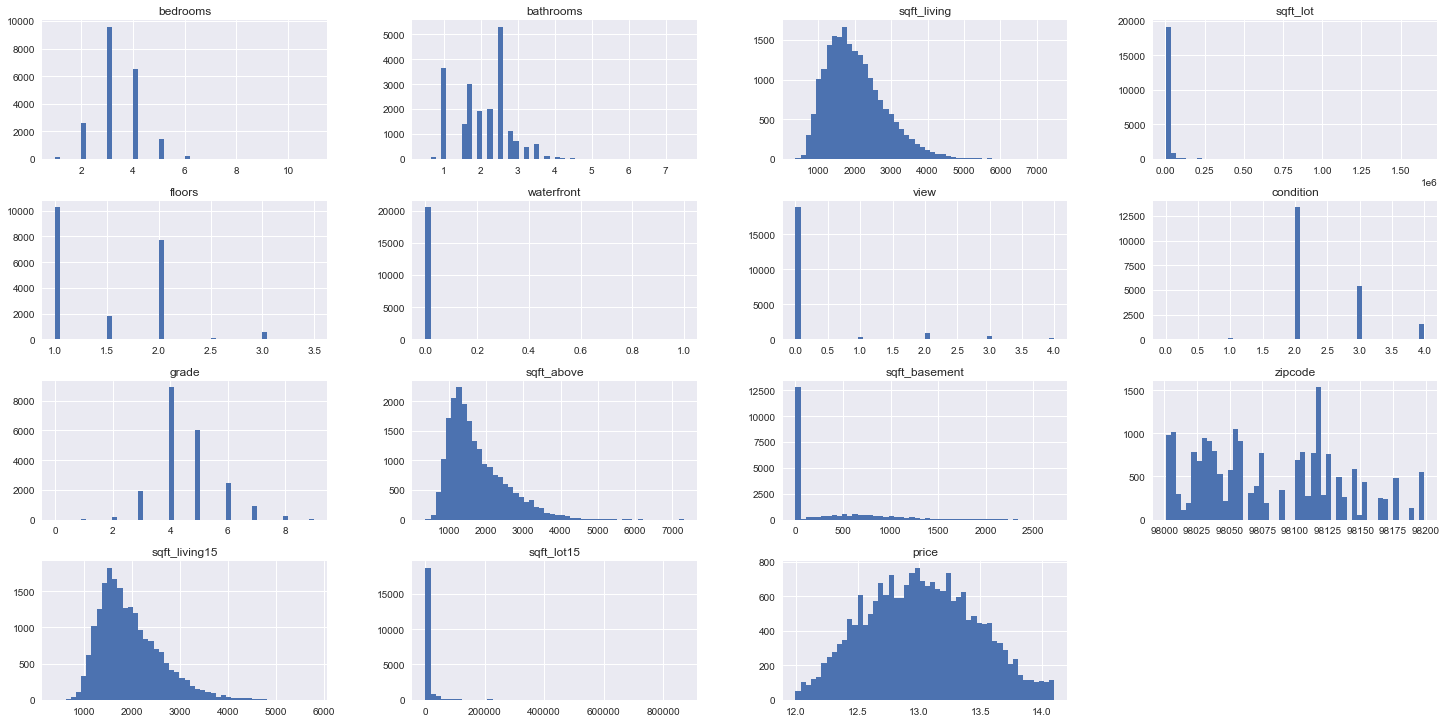

In [176]:
# plot histograms of all the columns in the set.
df_m.hist(bins=50, figsize=(25, 12.5))

Out of all the quant categories, I will just keep sqft_above, sqft_living15, and bedrooms. I will drop all other numericals to avoid non-normal variables or difficult normal transformational variable and to avoid multicollinearity. For example, sqrft_living is too highly correlated with price.

In [177]:
to_drop = ['bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'sqft_basement',
           'sqft_lot15']
for var in to_drop:
       df_m = df_m.drop([var], axis=1)
df_m.describe()

bedrooms  waterfront     view  condition    grade  sqft_above  zipcode  \
count  20584.00    20584.00 20584.00   20584.00 20584.00    20584.00 20584.00   
mean       3.36        0.00     0.19       2.41     4.59     1741.91 98078.34   
std        0.89        0.06     0.68       0.65     1.06      748.75    53.11   
min        1.00        0.00     0.00       0.00     0.00      370.00 98001.00   
25%        3.00        0.00     0.00       2.00     4.00     1190.00 98033.00   
50%        3.00        0.00     0.00       2.00     4.00     1540.00 98065.00   
75%        4.00        0.00     0.00       3.00     5.00     2150.00 98118.00   
max       11.00        1.00     4.00       4.00     9.00     7320.00 98199.00   

       sqft_living15    price  
count       20584.00 20584.00  
mean         1952.39    13.02  
std           636.49     0.45  
min           399.00    12.00  
25%          1480.00    12.69  
50%          1820.00    13.01  
75%          2310.00    13.34  
max          5790.00    14.10

#### Log transformations

In [178]:
var_list = ['bedrooms', 'sqft_living15', 'sqft_above']
df_m = var_log_transform(var_list, df_m)

array([[<AxesSubplot:title={'center':'waterfront'}>,
        <AxesSubplot:title={'center':'view'}>,
        <AxesSubplot:title={'center':'condition'}>],
       [<AxesSubplot:title={'center':'grade'}>,
        <AxesSubplot:title={'center':'zipcode'}>,
        <AxesSubplot:title={'center':'price'}>],
       [<AxesSubplot:title={'center':'bedrooms'}>,
        <AxesSubplot:title={'center':'sqft_living15'}>,
        <AxesSubplot:title={'center':'sqft_above'}>]], dtype=object)

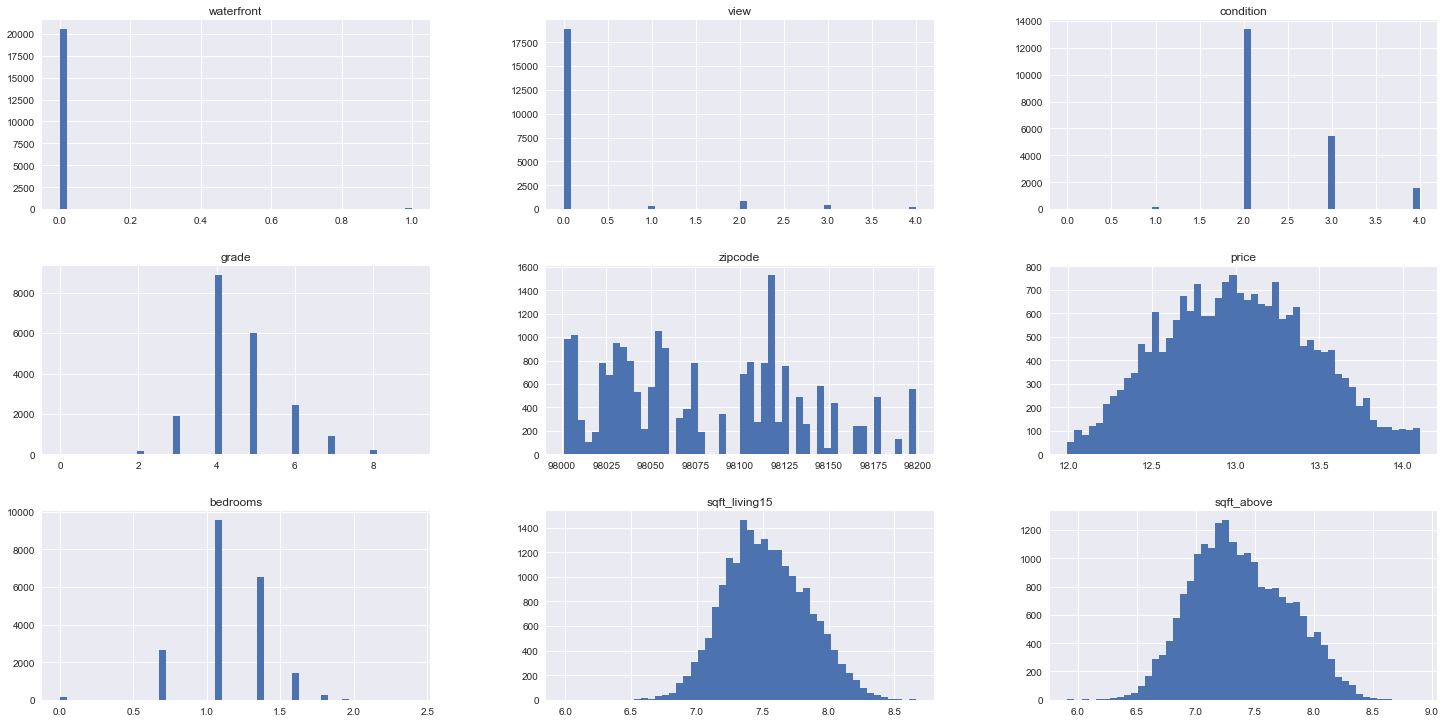

In [179]:
df_m.hist(bins=50, figsize=(25, 12.5))

#### Pre-processing part 2

In [180]:
# filter out outliers
numericals = [df_m.bedrooms, df_m.sqft_living15, df_m.sqft_above]

for var in numericals:
    # filter with helper function
    df_m = IQR_filter_numerical(var, df_m)
    
df_m.describe()

<ipython-input-24-61f3a56eb2fe>:13: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df = df[(cat < upper_bound) & (cat > lower_bound)]
<ipython-input-24-61f3a56eb2fe>:13: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df = df[(cat < upper_bound) & (cat > lower_bound)]


waterfront     view  condition    grade  zipcode    price  bedrooms  \
count    20292.00 20292.00   20292.00 20292.00 20292.00 20292.00  20292.00   
mean         0.00     0.19       2.41     4.60 98078.08    13.02      1.18   
std          0.05     0.67       0.65     1.04    53.14     0.44      0.25   
min          0.00     0.00       0.00     1.00 98001.00    12.00      0.69   
25%          0.00     0.00       2.00     4.00 98033.00    12.69      1.10   
50%          0.00     0.00       2.00     4.00 98065.00    13.01      1.10   
75%          0.00     0.00       3.00     5.00 98117.00    13.34      1.39   
max          1.00     4.00       4.00     9.00 98199.00    14.10      1.79   

       sqft_living15  sqft_above  
count       20292.00    20292.00  
mean            7.53        7.38  
std             0.31        0.40  
min             6.63        6.25  
25%             7.31        7.09  
50%             7.51        7.35  
75%             7.75        7.67  
max             8.41        8.55

In [181]:
# filter based on IQR in categorical variables
categoricals = ['waterfront', 'view', 'condition', 'grade', 'zipcode']
for cat in categoricals:
    df_m = IQR_filter_categorical(cat, df_m)

df_m.describe()

waterfront     view  condition    grade  zipcode    price  bedrooms  \
count    19868.00 19868.00   19868.00 19868.00 19868.00 19868.00  19868.00   
mean         0.00     0.17       2.42     4.58 98078.22    13.01      1.18   
std          0.04     0.64       0.65     1.02    53.08     0.44      0.25   
min          0.00     0.00       0.00     1.00 98001.00    12.00      0.69   
25%          0.00     0.00       2.00     4.00 98033.00    12.69      1.10   
50%          0.00     0.00       2.00     4.00 98065.00    13.01      1.10   
75%          0.00     0.00       3.00     5.00 98118.00    13.33      1.39   
max          1.00     4.00       4.00     9.00 98199.00    14.10      1.79   

       sqft_living15  sqft_above  
count       19868.00    19868.00  
mean            7.52        7.38  
std             0.30        0.39  
min             6.63        6.25  
25%             7.31        7.09  
50%             7.51        7.34  
75%             7.74        7.66  
max             8.41        8.55

array([[<AxesSubplot:title={'center':'waterfront'}>,
        <AxesSubplot:title={'center':'view'}>,
        <AxesSubplot:title={'center':'condition'}>],
       [<AxesSubplot:title={'center':'grade'}>,
        <AxesSubplot:title={'center':'zipcode'}>,
        <AxesSubplot:title={'center':'price'}>],
       [<AxesSubplot:title={'center':'bedrooms'}>,
        <AxesSubplot:title={'center':'sqft_living15'}>,
        <AxesSubplot:title={'center':'sqft_above'}>]], dtype=object)

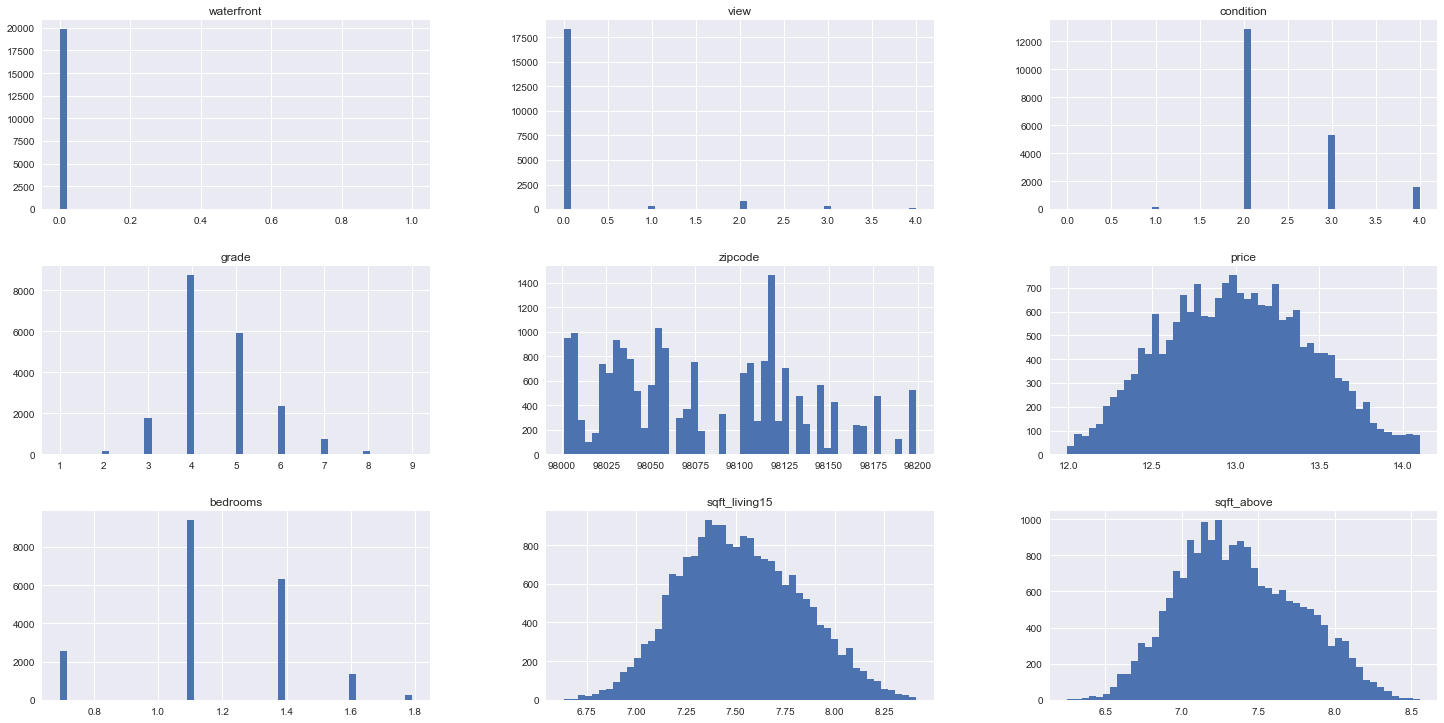

In [182]:
# check histograms again
df_m.hist(bins=50, figsize=(25, 12.5))

<AxesSubplot:xlabel='waterfront', ylabel='price'>

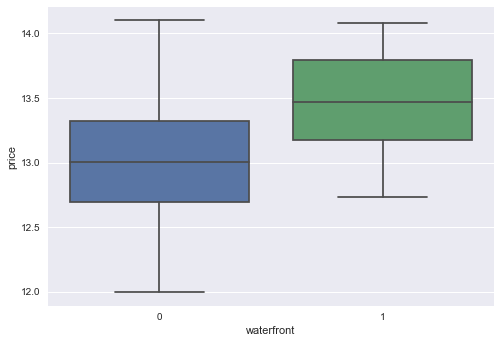

In [183]:
sns.boxplot(x=df_m.waterfront, y=df_m.price)

<AxesSubplot:xlabel='view', ylabel='price'>

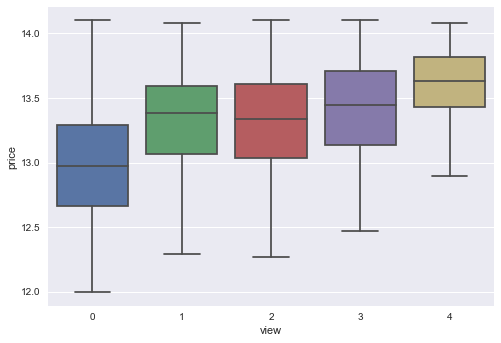

In [184]:
sns.boxplot(x=df_m.view, y=df_m.price)

#### Check linearity assumption

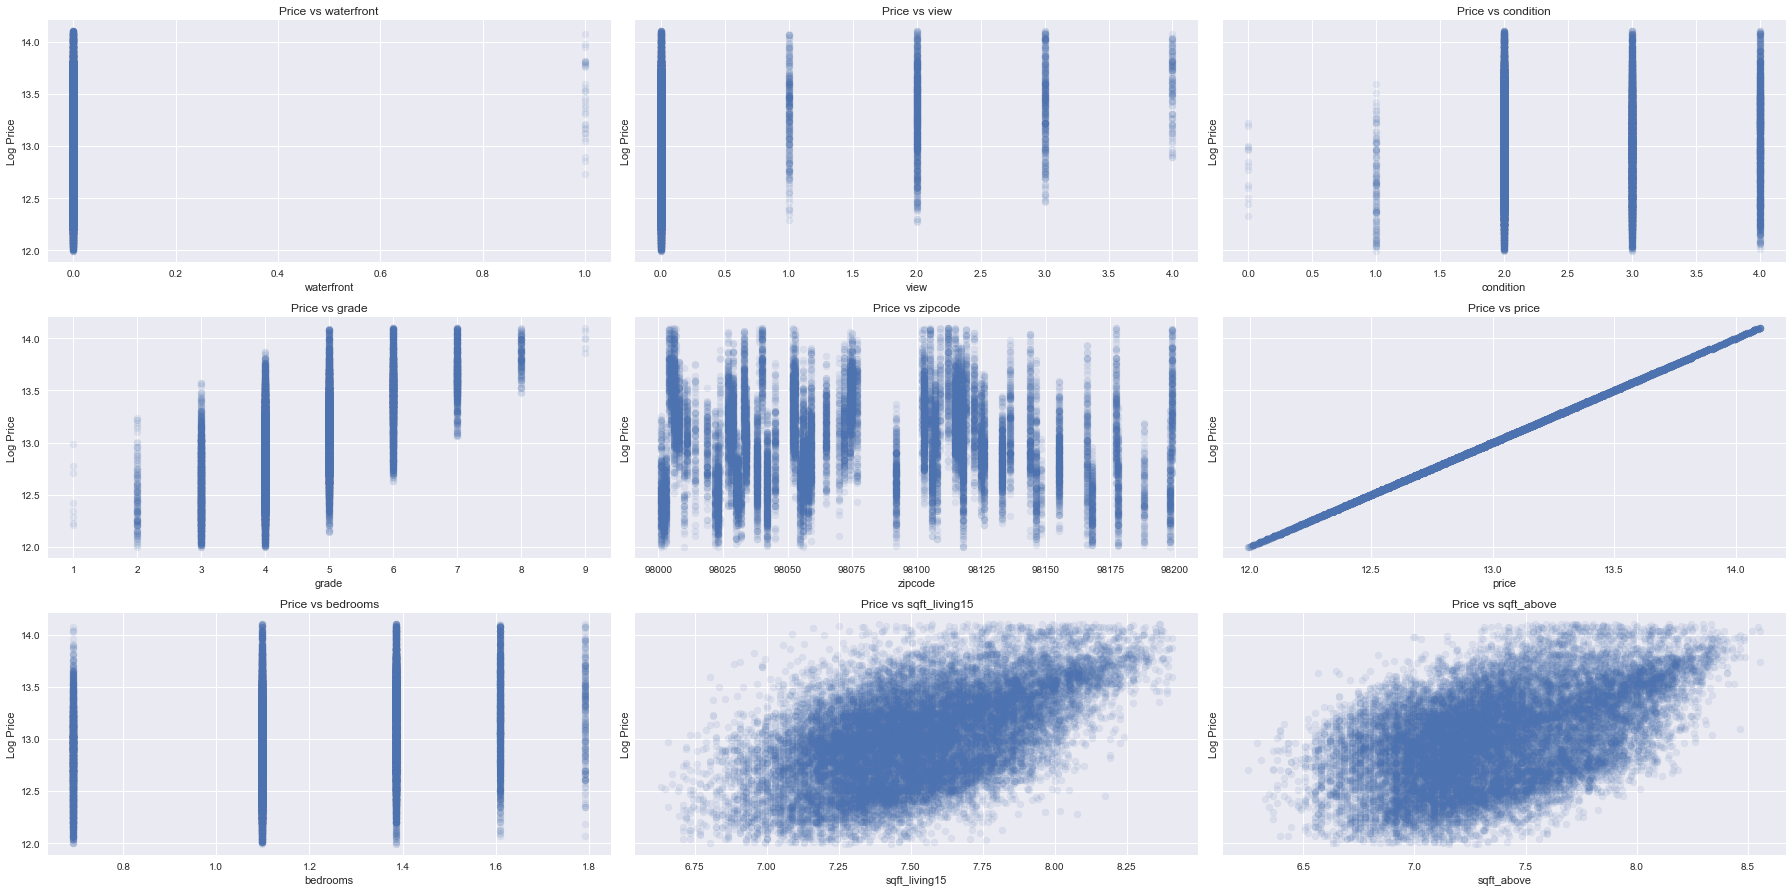

In [185]:
# visualize scatterplots of histograms with price as y variable

fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(25, 12.5), sharey=True)

for ax, column in zip(axes.flatten(), df_m.columns):
    ax.scatter(df_m[column], df_m['price'], label=column, alpha=.1)
    ax.set_title(f'Price vs {column}')
    ax.set_xlabel(column)
    ax.set_ylabel('Log Price')

fig.tight_layout()

#### Dummy variables

In [186]:
df_m = dum_transformation(categoricals, df_m)

#### Check high correlating features

In [187]:
# adapting code from lab: https://github.com/learn-co-curriculum/dsc-multicollinearity-of-features-lab/tree/solution

df_mc = df_m.corr().abs().stack().reset_index().sort_values(0, ascending=False)

df_mc['pairs'] = list(zip(df_mc.level_0, df_mc.level_1))
df_mc.set_index(['pairs'], inplace = True)

df_mc.drop(columns=['level_1', 'level_0'], inplace = True)

# cc for correlation coefficient
df_mc.columns = ['cc']

df_mc.drop_duplicates(inplace=True)

df_mc[(df_mc.cc>.5) & (df_mc.cc<1)]

cc
pairs                           
(condition_2, condition_3)  0.82
(sqft_living15, sqft_above) 0.69
(grade_5, grade_4)          0.58
(price, sqft_living15)      0.55
(bedrooms, sqft_above)      0.51

In [188]:
# drop condition 2, sqft_living15, grade 4, bedrooms
to_drop = ['sqft_living15', 'grade_4', 'condition_2', 'bedrooms']
for var in to_drop:
       df_m = df_m.drop([var], axis=1)
df_m.describe()

price  sqft_above  waterfront_1   view_1   view_2   view_3   view_4  \
count 19868.00    19868.00      19868.00 19868.00 19868.00 19868.00 19868.00   
mean     13.01        7.38          0.00     0.01     0.04     0.02     0.01   
std       0.44        0.39          0.04     0.12     0.20     0.13     0.08   
min      12.00        6.25          0.00     0.00     0.00     0.00     0.00   
25%      12.69        7.09          0.00     0.00     0.00     0.00     0.00   
50%      13.01        7.34          0.00     0.00     0.00     0.00     0.00   
75%      13.33        7.66          0.00     0.00     0.00     0.00     0.00   
max      14.10        8.55          1.00     1.00     1.00     1.00     1.00   

       condition_1  condition_3  condition_4  ...  zipcode_98146  \
count     19868.00     19868.00     19868.00  ...       19868.00   
mean          0.01         0.27         0.08  ...           0.01   
std           0.08         0.44         0.27  ...           0.11   
min           0.00         0.00         0.00  ...           0.00   
25%           0.00         0.00         0.00  ...           0.00   
50%           0.00         0.00         0.00  ...           0.00   
75%           0.00         1.00         0.00  ...           0.00   
max           1.00         1.00         1.00  ...           1.00   

       zipcode_98148  zipcode_98155  zipcode_98166  zipcode_98168  \
count       19868.00       19868.00       19868.00       19868.00   
mean            0.00           0.02           0.01           0.01   
std             0.05           0.15           0.11           0.11   
min             0.00           0.00           0.00           0.00   
25%             0.00           0.00           0.00           0.00   
50%             0.00           0.00           0.00           0.00   
75%             0.00           0.00           0.00           0.00   
max             1.00           1.00           1.00           1.00   

       zipcode_98177  zipcode_98178  zipcode_98188  zipcode_98198  \
count       19868.00       19868.00       19868.00       19868.00   
mean            0.01           0.01           0.01           0.01   
std             0.11           0.11           0.08           0.11   
min             0.00           0.00           0.00           0.00   
25%             0.00           0.00           0.00           0.00   
50%             0.00           0.00           0.00           0.00   
75%             0.00           0.00           0.00           0.00   
max             1.00           1.00           1.00           1.00   

       zipcode_98199  
count       19868.00  
mean            0.01  
std             0.12  
min             0.00  
25%             0.00  
50%             0.00  
75%             0.00  
max             1.00  

[8 rows x 86 columns]

#### Model

In [189]:
res, X, df_y, df_x, df_train_x, df_train_y = sm_lin_model(df_m)
print(str(res.summary()))

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.830
Model:                            OLS   Adj. R-squared:                  0.829
Method:                 Least Squares   F-statistic:                     851.5
Date:                Sat, 30 Apr 2022   Prob (F-statistic):               0.00
Time:                        22:57:53   Log-Likelihood:                 4385.6
No. Observations:               14901   AIC:                            -8599.
Df Residuals:                   14815   BIC:                            -7945.
Df Model:                          85                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             9.6876      0.044    219.682

In [190]:
multicollinearity_check(df_x)

[('sqft_above', 56.90461958738604),
 ('waterfront_1', 1.2036191176845976),
 ('view_1', 1.0501762264934196),
 ('view_2', 1.1008113556770234),
 ('view_3', 1.0701809789595385),
 ('view_4', 1.1684461661686847),
 ('condition_1', 1.025492059839212),
 ('condition_3', 1.5828334188123325),
 ('condition_4', 1.1932497022618584),
 ('grade_2', 1.0395551187164498),
 ('grade_3', 1.289499956296795),
 ('grade_5', 1.9218621336131398),
 ('grade_6', 1.5733857111590708),
 ('grade_7', 1.3201479036676516),
 ('grade_8', 1.0861972537635338),
 ('grade_9', 1.0090181084784),
 ('zipcode_98002', 1.5114243904701519),
 ('zipcode_98003', 1.688605024717359),
 ('zipcode_98004', 1.470004329619452),
 ('zipcode_98005', 1.4611625136468256),
 ('zipcode_98006', 2.2224728147288526),
 ('zipcode_98007', 1.3819108106426001),
 ('zipcode_98008', 1.7094993766678195),
 ('zipcode_98010', 1.2750944829114363),
 ('zipcode_98011', 1.5183283818859055),
 ('zipcode_98014', 1.2965403822193349),
 ('zipcode_98019', 1.5088629548744334),
 ('zipco

In [191]:
# condition has low coefficient value... going to drop all of those 1,3,4
# dropping zipcodes with too high of p-value
# dropping sqft_above because of high mc value
to_drop = ['zipcode_98002', 'zipcode_98003', 'zipcode_98022', 'zipcode_98023',
           'zipcode_98032', 'sqft_above', 'condition_1', 'condition_3', 
           'condition_4']
for var in to_drop:
       df_m = df_m.drop([var], axis=1)
df_m.describe()

price  waterfront_1   view_1   view_2   view_3   view_4  grade_2  \
count 19868.00      19868.00 19868.00 19868.00 19868.00 19868.00 19868.00   
mean     13.01          0.00     0.01     0.04     0.02     0.01     0.01   
std       0.44          0.04     0.12     0.20     0.13     0.08     0.09   
min      12.00          0.00     0.00     0.00     0.00     0.00     0.00   
25%      12.69          0.00     0.00     0.00     0.00     0.00     0.00   
50%      13.01          0.00     0.00     0.00     0.00     0.00     0.00   
75%      13.33          0.00     0.00     0.00     0.00     0.00     0.00   
max      14.10          1.00     1.00     1.00     1.00     1.00     1.00   

       grade_3  grade_5  grade_6  ...  zipcode_98146  zipcode_98148  \
count 19868.00 19868.00 19868.00  ...       19868.00       19868.00   
mean      0.09     0.30     0.12  ...           0.01           0.00   
std       0.28     0.46     0.32  ...           0.11           0.05   
min       0.00     0.00     0.00  ...           0.00           0.00   
25%       0.00     0.00     0.00  ...           0.00           0.00   
50%       0.00     0.00     0.00  ...           0.00           0.00   
75%       0.00     1.00     0.00  ...           0.00           0.00   
max       1.00     1.00     1.00  ...           1.00           1.00   

       zipcode_98155  zipcode_98166  zipcode_98168  zipcode_98177  \
count       19868.00       19868.00       19868.00       19868.00   
mean            0.02           0.01           0.01           0.01   
std             0.15           0.11           0.11           0.11   
min             0.00           0.00           0.00           0.00   
25%             0.00           0.00           0.00           0.00   
50%             0.00           0.00           0.00           0.00   
75%             0.00           0.00           0.00           0.00   
max             1.00           1.00           1.00           1.00   

       zipcode_98178  zipcode_98188  zipcode_98198  zipcode_98199  
count       19868.00       19868.00       19868.00       19868.00  
mean            0.01           0.01           0.01           0.01  
std             0.11           0.08           0.11           0.12  
min             0.00           0.00           0.00           0.00  
25%             0.00           0.00           0.00           0.00  
50%             0.00           0.00           0.00           0.00  
75%             0.00           0.00           0.00           0.00  
max             1.00           1.00           1.00           1.00  

[8 rows x 77 columns]

In [192]:
res, X, df_y, df_x, df_train_x, df_train_y = sm_lin_model(df_m)
print(str(res.summary()))

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.775
Model:                            OLS   Adj. R-squared:                  0.774
Method:                 Least Squares   F-statistic:                     672.9
Date:                Sat, 30 Apr 2022   Prob (F-statistic):               0.00
Time:                        22:58:18   Log-Likelihood:                 2302.5
No. Observations:               14901   AIC:                            -4451.
Df Residuals:                   14824   BIC:                            -3865.
Df Model:                          76                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            12.4212      0.006   1983.273

In [193]:
multicollinearity_check(df_x)

[('waterfront_1', 1.2032906902730636),
 ('view_1', 0.06891478512735333),
 ('view_2', 0.04501046287649605),
 ('view_3', 0.2871927773592595),
 ('view_4', 1.166893043949353),
 ('grade_2', 1.0316567831056407),
 ('grade_3', 0.163367287653577),
 ('grade_5', 0.007856972239377626),
 ('grade_6', 0.02080755464380297),
 ('grade_7', 0.008124288177426114),
 ('grade_8', 1.0687887671752228),
 ('grade_9', 1.0084318514832367),
 ('zipcode_98004', 1.0154732572370995),
 ('zipcode_98005', 1.0291899833659242),
 ('zipcode_98006', 0.44430059820928564),
 ('zipcode_98007', 1.0126884619575216),
 ('zipcode_98008', 0.015628400145802857),
 ('zipcode_98010', 1.0094593994004706),
 ('zipcode_98011', 1.014585909071014),
 ('zipcode_98014', 1.00890602703633),
 ('zipcode_98019', 1.0120662108954097),
 ('zipcode_98024', 1.0072052385084642),
 ('zipcode_98027', 0.3666548046770246),
 ('zipcode_98028', 0.06333715833708614),
 ('zipcode_98029', 0.19671383963904307),
 ('zipcode_98030', 1.010828897670858),
 ('zipcode_98031', 0.0192

#### Check Assumptions

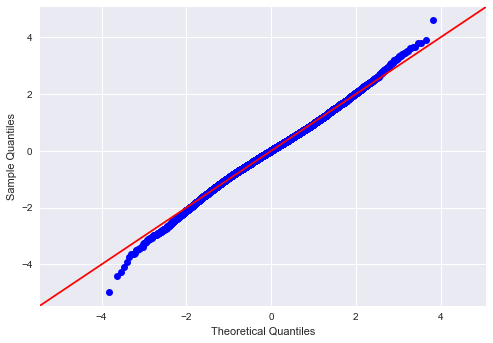

In [194]:
sm_check_resid_normality(res)

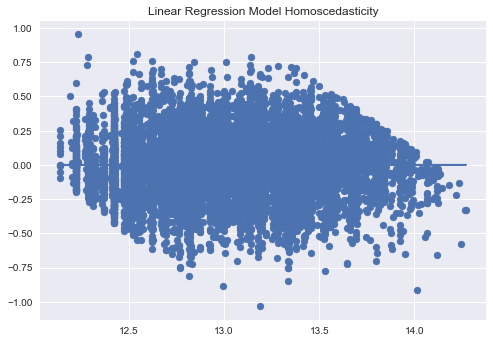

In [195]:
sm_check_scedas(res, df_train_y, X)

In [196]:
# generate predictions
ypred = res.predict(X)

z = np.exp(df_train_y['price'])
z1 = np.exp(ypred)

mae = meanabs
mae = mae(z, z1)
mae

78917.49710075944

In [197]:
#### Sale TYPE may be interesting to look at as well. For instance, whether the 
# sale was completed via a corporate entity or an individual.
# One reason why this might be significant is that a corporate entity will 
# typically be looking to profit as much as possible from the deal and will
# have expertise. An individual might take a lower offer for various reasons:
# lack of expertise, incentive to sell the property quickly (i.e. already moved
# into a new house), or they could have even sold at discount to a family member.

In [198]:
# Note that there are also accessory buildings that might be located on a 
# property, which may boost value and squarefootage of buildings. For ex,
# there could be a barn on a property, which would boost value.

## Interpretation of Model

### Finding 1: R-squared value

Model 3 has an r-squared value of about 78%, which means that is able to explain about 78% of the variance of the actual data points from the predicted values represented by the model.
Below is a visualization of the model versus the actual values. Keep in mind that the actual values were log-normalized, so the error represented by the difference between actual vs. predicted values is extrapolated to a much larger degree than, say, the first model's visual representation of error.

In [199]:
# visualize the error in model 3
X = df2.drop(['price'], axis=1)
y = df2['price']
lin_model(X,y)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=24)
y_hat = lr.predict(X_train)

plt.figure(figsize=(12, 8))

ax = sns.distplot(df2['price'], hist=False, color="b", 
                  label="Actual (Log) Prices")
sns.distplot(y_hat, hist=False, color="y", label="Predicted (Log) Values" ,
             ax=ax)


plt.title('Actual vs Predicted Values for Home Prices')
plt.xlabel('Log Price')
plt.ylabel('Density')

plt.legend()
plt.show()
plt.close()

NameError: name 'df2' is not defined

As seen by this visualization and the r-squared value, the model is not perfect. However, it does at least offer a very good starting point for ruling out homes or further investigating homes to build or buy. It can also offer a way in which the stakeholder can understand whether a particular home may be under or overvalued.

### Finding 2: Most significant model coefficients

In [ ]:
# create df with coefficient names and values

# re-establish linear regression model to extract relevant info
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=24)
lr.fit(X_train, y_train)

# define names and values of the coefficients
co_names = X_train.columns   # X_train columns - labels with log-transform
co_values = lr.coef_

# create df with these variables
df_coefs = pd.DataFrame(list(zip(co_names, co_values)), 
                        columns=['Coefficients', 'Values'])

# suppress scientific notation
pd.set_option('display.float_format', lambda x: '%.7f' % x)

# change values in 'Values' to absolute - we care about the magnitude
df_coefs['Values'] = df_coefs['Values'].abs() 

df_coefs.sort_values(by='Values', ascending=False)     # highest values at top

The most significant coefficients are lat, waterfront, and sqft_above. 
Further investigation of why these coefficients are the most significant is offered below.

#####  Latitude

In [ ]:
# ceate QQ-plot of lat to investigate linearity
import statsmodels.api as sm
import scipy.stats as stats
fig = sm.graphics.qqplot(df2['lat'], dist=stats.norm, line='45', fit=True)

Latitude is roughly linear and when plotted against price, it has a somewhat trimodal distribution with the first bell curve seeming about half the size as the other two (as seen in 4.1). 
Interpretation of lat characteristics:
* Rough linearity facilitates greater significance in linear regression.
* The trimodality of latitude versus price is insignificant, but latitude trends upward as price does (seen in 4.2), which facilitates greater significance in linear regression.

##### Waterfront

* Look at the values found in waterfront and their frequency.
* Look at scatterplot of waterfront vs. price.

In [ ]:
df['waterfront'].value_counts()

Most properties are not waterfront properties or they did not have an entry included. Only 146 homes are waterfront properties.

In [ ]:
plt.scatter(df['waterfront'], df['price'] / 100_000, alpha=0.2)

Observations:
* Almost all homes are concentrated in lower value ranges and do not have waterfronts.
* It seems that the model is deriving weight from the waterfront variable by ascribing significance in the frequency of homes with a waterfront. For instance it is safe to say that homes without a waterfront will have a low price (in general), and homes with a waterfront will typically trend higher in price.

##### sqft_above

The third highest linear relationship among the coefficients with price is sqft_above. This relationship is intuitive because one would expect that as the square footage of a home increases, then the price would increase proportionally. Additionally, sqft_above is log-normal and has a fairly linear relationship with price. This relationship will be shown again below.

In [ ]:
plt.scatter(df['sqft_above'], df['price'] / 100_000, alpha=0.1)